<a href="https://colab.research.google.com/github/KaviyaThangadurai/Data-Analyst/blob/main/Bank_Loan_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description:
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

In [ ]:
#importing all the important libraries like numpy. pandas, matlplolib, and warnings to keep notebook clean

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# to suppress warnings

import warnings   
warnings.filterwarnings("ignore")

In [ ]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

Dataset 1 - "application_data.csv"
1. reading and understanding the data
1.1 Importing the dataset

In [ ]:
# importing application_data.csv

appl_data = pd.read_csv("application_data.csv")

1.2 Understanding the dataset

In [ ]:
#checking the rows and columns of the raw dataset

appl_data.shape

(10825, 122)

In [ ]:
#Checking information of all the columns like data types
appl_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10825 entries, 0 to 10824
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS

There are 122 columns having various data types like object, int, float and 10825 rows

In [ ]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Checking the numeric variables of the dataframes
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,10825.000000,10825.000000,10825.000000,1.082500e+04,1.082500e+04,10825.000000,1.081700e+04,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,3615.000000,10825.0,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.00000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,4713.000000,10798.000000,8680.000000,5368.000000,4546.000000,5564.000000,3640.000000,3272.000000,5104.000000,5427.000000,5496.000000,3477.000000,4454.000000,3418.000000,5422.000000,3316.000000,4922.000000,5368.000000,4546.000000,5564.000000,3640.000000,3272.000000,5104.000000,5427.000000,5496.00000,3477.000000,4454.000000,3418.000000,5422.000000,3316.000000,4922.000000,5368.000000,4546.000000,5564.000000,3640.000000,3272.000000,5104.000000,5427.000000,5496.000000,3477.000000,4454.000000,3418.000000,5422.000000,3316.000000,4922.000000,5633.000000,10775.000000,10775.000000,10775.000000,10775.000000,10824.000000,10824.0,10824.000000,10824.000000,10824.000000,10824.000000,10824.0,10824.000000,10824.000000,10824.0,10824.000000,10824.0,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,10824.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000
mean,106310.699677,0.077598,0.417275,1.677415e+05,6.002651e+05,27068.302309,5.398798e+05,0.020879,-16009.030485,62712.135612,-4978.061247,-2983.412933,11.972337,1.0,0.822818,0.200739,0.998337,0.282679,0.054688,2.159815,2.047575,2.026236,12.08388,0.016536,0.049792,0.038707,0.081016,0.236305,0.181155,0.504138,0.515328,0.511176,0.117011,0.089271,0.979076,0.750621,0.043908,0.076948,0.150250,0.225950,0.230582,0.066739,0.099142,0.106832,0.008408,0.028634,0.113369,0.088343,0.978015,0.757269,0.041416,0.072499,0.145767,0.22180,0.226628,0.065201,0.103201,0.104940,0.007716,0.027506,0.117680,0.088959,0.979085,0.753962,0.044088,0.076520,0.150011,0.225582,0.230373,0.067635,0.100550,0.108317,0.008352,0.028726,0.101511,1.413364,0.147657,1.397865,0.103109,-961.195214,0.0,0.712676,0.0

INSIGHT

there are 122 columns and 10825 rows.
there columns having negative, postive values which includes days. fixing is required
there are columns with very hight values, columns related to Amount(Price). standardising is required, will perform these task later in the notebook

2. Data Cleaning & Manipulation 2.1 Null Values

In [ ]:
#checking how many null values are present in each of the columns

#creating a function to find null values for the dataframe
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
    

In [ ]:
null_values(appl_data)

COMMONAREA_MODE                 69.77
COMMONAREA_AVG                  69.77
COMMONAREA_MEDI                 69.77
NONLIVINGAPARTMENTS_MODE        69.37
NONLIVINGAPARTMENTS_AVG         69.37
NONLIVINGAPARTMENTS_MEDI        69.37
FONDKAPREMONT_MODE              68.49
LIVINGAPARTMENTS_AVG            68.42
LIVINGAPARTMENTS_MODE           68.42
LIVINGAPARTMENTS_MEDI           68.42
FLOORSMIN_MEDI                  67.88
FLOORSMIN_MODE                  67.88
FLOORSMIN_AVG                   67.88
OWN_CAR_AGE                     66.61
YEARS_BUILD_MEDI                66.37
YEARS_BUILD_AVG                 66.37
YEARS_BUILD_MODE                66.37
LANDAREA_MODE                   58.85
LANDAREA_AVG                    58.85
LANDAREA_MEDI                   58.85
BASEMENTAREA_MEDI               58.00
BASEMENTAREA_AVG                58.00
BASEMENTAREA_MODE               58.00
EXT_SOURCE_1                    56.46
NONLIVINGAREA_MODE              54.53
NONLIVINGAREA_AVG               54.53
NONLIVINGARE

### 2.1.1 Dealing with Null values more than 50 %

In [ ]:
#creating a variable null_col_50 for storing null columns having missing values more than 50%

null_col_50 = null_values(appl_data)[null_values(appl_data)>50]

In [ ]:
#revieving null_col_50

print(null_col_50)
print()
print("Num of columns having missing values more than 50% :",len(null_col_50))

COMMONAREA_MODE             69.77
COMMONAREA_AVG              69.77
COMMONAREA_MEDI             69.77
NONLIVINGAPARTMENTS_MODE    69.37
NONLIVINGAPARTMENTS_AVG     69.37
NONLIVINGAPARTMENTS_MEDI    69.37
FONDKAPREMONT_MODE          68.49
LIVINGAPARTMENTS_AVG        68.42
LIVINGAPARTMENTS_MODE       68.42
LIVINGAPARTMENTS_MEDI       68.42
FLOORSMIN_MEDI              67.88
FLOORSMIN_MODE              67.88
FLOORSMIN_AVG               67.88
OWN_CAR_AGE                 66.61
YEARS_BUILD_MEDI            66.37
YEARS_BUILD_AVG             66.37
YEARS_BUILD_MODE            66.37
LANDAREA_MODE               58.85
LANDAREA_AVG                58.85
LANDAREA_MEDI               58.85
BASEMENTAREA_MEDI           58.00
BASEMENTAREA_AVG            58.00
BASEMENTAREA_MODE           58.00
EXT_SOURCE_1                56.46
NONLIVINGAREA_MODE          54.53
NONLIVINGAREA_AVG           54.53
NONLIVINGAREA_MEDI          54.53
ELEVATORS_AVG               52.85
ELEVATORS_MEDI              52.85
ELEVATORS_MODE

INSIGHT

There are 34 columns having null values more than 50% which are related to different area sizes on apartment owned/rented by the loan applicant

In [ ]:
null_col_50.index  # Will drop all these columns

Index(['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'OWN_CAR_AGE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE'], dtype='object')

In [ ]:
# Now lets drop all the columns having missing values more than 50% that is 38 columns

appl_data.drop(columns = null_col_50.index, inplace = True)

In [ ]:
appl_data.shape  # Now there are 88 columns remaining


(10825, 88)

After dropping 38 columns we are left with 88 columns

2.1.2 Dealing with null values more than 15%

In [ ]:
# now we will deal with null values more than 15% 

null_col_15 = null_values(appl_data)[null_values(appl_data)>15]

In [ ]:
null_col_15 

LIVINGAREA_AVG                  49.91
LIVINGAREA_MODE                 49.91
LIVINGAREA_MEDI                 49.91
ENTRANCES_AVG                   49.87
ENTRANCES_MODE                  49.87
ENTRANCES_MEDI                  49.87
HOUSETYPE_MODE                  49.83
FLOORSMAX_AVG                   49.23
FLOORSMAX_MODE                  49.23
FLOORSMAX_MEDI                  49.23
YEARS_BEGINEXPLUATATION_MEDI    48.60
YEARS_BEGINEXPLUATATION_MODE    48.60
YEARS_BEGINEXPLUATATION_AVG     48.60
TOTALAREA_MODE                  47.96
EMERGENCYSTATE_MODE             47.08
OCCUPATION_TYPE                 31.07
EXT_SOURCE_3                    19.82
dtype: float64

from the columns dictionary we can conclude that only 'OCCUPATION_TYPE', 'EXT_SOURCE_3 looks relevant to TARGET column.thus dropping all other columns except 'OCCUPATION_TYPE','EXT_SOURCE_3

In [ ]:
#removing 'OCCUPATION_TYPE', 'EXT_SOURCE_3' from "null_col_15" so that we can drop all other at once.

null_col_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace = True)

In [ ]:
print(null_col_15)
print()
print("No of columns having missing values more than 15% and are not reletable:",len(null_col_15))

LIVINGAREA_AVG                  49.91
LIVINGAREA_MODE                 49.91
LIVINGAREA_MEDI                 49.91
ENTRANCES_AVG                   49.87
ENTRANCES_MODE                  49.87
ENTRANCES_MEDI                  49.87
HOUSETYPE_MODE                  49.83
FLOORSMAX_AVG                   49.23
FLOORSMAX_MODE                  49.23
FLOORSMAX_MEDI                  49.23
YEARS_BEGINEXPLUATATION_MEDI    48.60
YEARS_BEGINEXPLUATATION_MODE    48.60
YEARS_BEGINEXPLUATATION_AVG     48.60
TOTALAREA_MODE                  47.96
EMERGENCYSTATE_MODE             47.08
dtype: float64

No of columns having missing values more than 15% and are not reletable: 15


In [ ]:
#thus removing columns having missing values more than 15% and which are not reletable to TARGET column.

appl_data.drop(null_col_15.index,axis=1, inplace = True)

In [ ]:
appl_data.shape  # After dropping null_col_15, we have left with 73 columns

(10825, 73)

* After after dropping 15 columns we are left with 73 columns
* There are 2 more Columns with missing values more than 15%

In [ ]:
null_values(appl_data).head(10)

OCCUPATION_TYPE               31.07
EXT_SOURCE_3                  19.82
AMT_REQ_CREDIT_BUREAU_YEAR    13.54
AMT_REQ_CREDIT_BUREAU_QRT     13.54
AMT_REQ_CREDIT_BUREAU_MON     13.54
AMT_REQ_CREDIT_BUREAU_WEEK    13.54
AMT_REQ_CREDIT_BUREAU_DAY     13.54
AMT_REQ_CREDIT_BUREAU_HOUR    13.54
DEF_30_CNT_SOCIAL_CIRCLE       0.46
OBS_30_CNT_SOCIAL_CIRCLE       0.46
dtype: float64

2.2 Analyse & Removing Unneccsary Columns
2.2.1 Starting with EXT_SOURCE_3 , EXT_SOURCE_2. As they have normalised values, now we will understand the relation between these columns with TARGET column using a heatmap

In [ ]:
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]  # putting irrevlent columns in varibale "irrev"

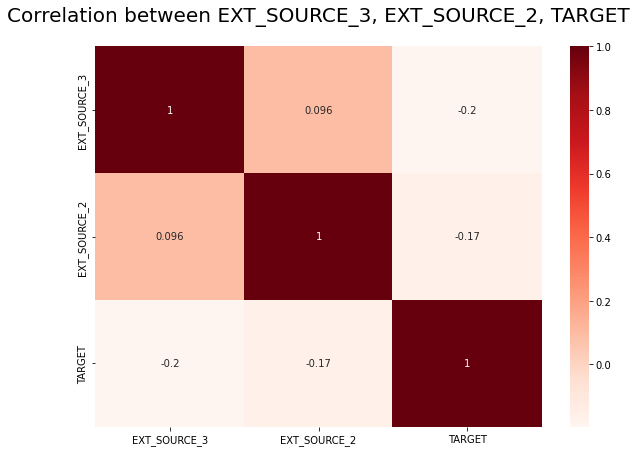

In [ ]:
plt.figure(figsize= [10,7])

sns.heatmap(appl_data[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":20}, pad=25)
plt.show()

There seems to be no linear correlation and also from columns description we decided to remove these columns.
Also we are aware correation doesn't cause causation

In [ ]:
#dropping above columns as decided

appl_data.drop(irrev, axis=1, inplace= True)

In [ ]:
appl_data.shape  # Now we are left with 71 columns

(10825, 71)

In [ ]:
null_values(appl_data).head(10)

OCCUPATION_TYPE               31.07
AMT_REQ_CREDIT_BUREAU_YEAR    13.54
AMT_REQ_CREDIT_BUREAU_QRT     13.54
AMT_REQ_CREDIT_BUREAU_MON     13.54
AMT_REQ_CREDIT_BUREAU_WEEK    13.54
AMT_REQ_CREDIT_BUREAU_DAY     13.54
AMT_REQ_CREDIT_BUREAU_HOUR    13.54
DEF_60_CNT_SOCIAL_CIRCLE       0.46
OBS_30_CNT_SOCIAL_CIRCLE       0.46
DEF_30_CNT_SOCIAL_CIRCLE       0.46
dtype: float64

2.2.2 Now we will check columns with FLAGS and their relation with TARGET columns to remove irrelevant ones
For this we will create a dataframe containig all FLAG columns and then plot bar graphs for each column with respect to TARGET column for which "0" will represent as Repayer and "1" will represent as Defaulter

In [ ]:
# adding all flags coloumns in variable "flag_columns"

flag_columns = [col for col in appl_data.columns if "FLAG" in col]

flag_columns  # Viewing all FLAG columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
# creating flag_df dataframe having all FLAG columns and TARGET column

flag_df = appl_data[flag_columns+["TARGET"]]

In [ ]:
# replacing "0" as repayer and "1" as defaulter for TARGET column

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

In [ ]:
# as stated in columnn description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

In [ ]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer


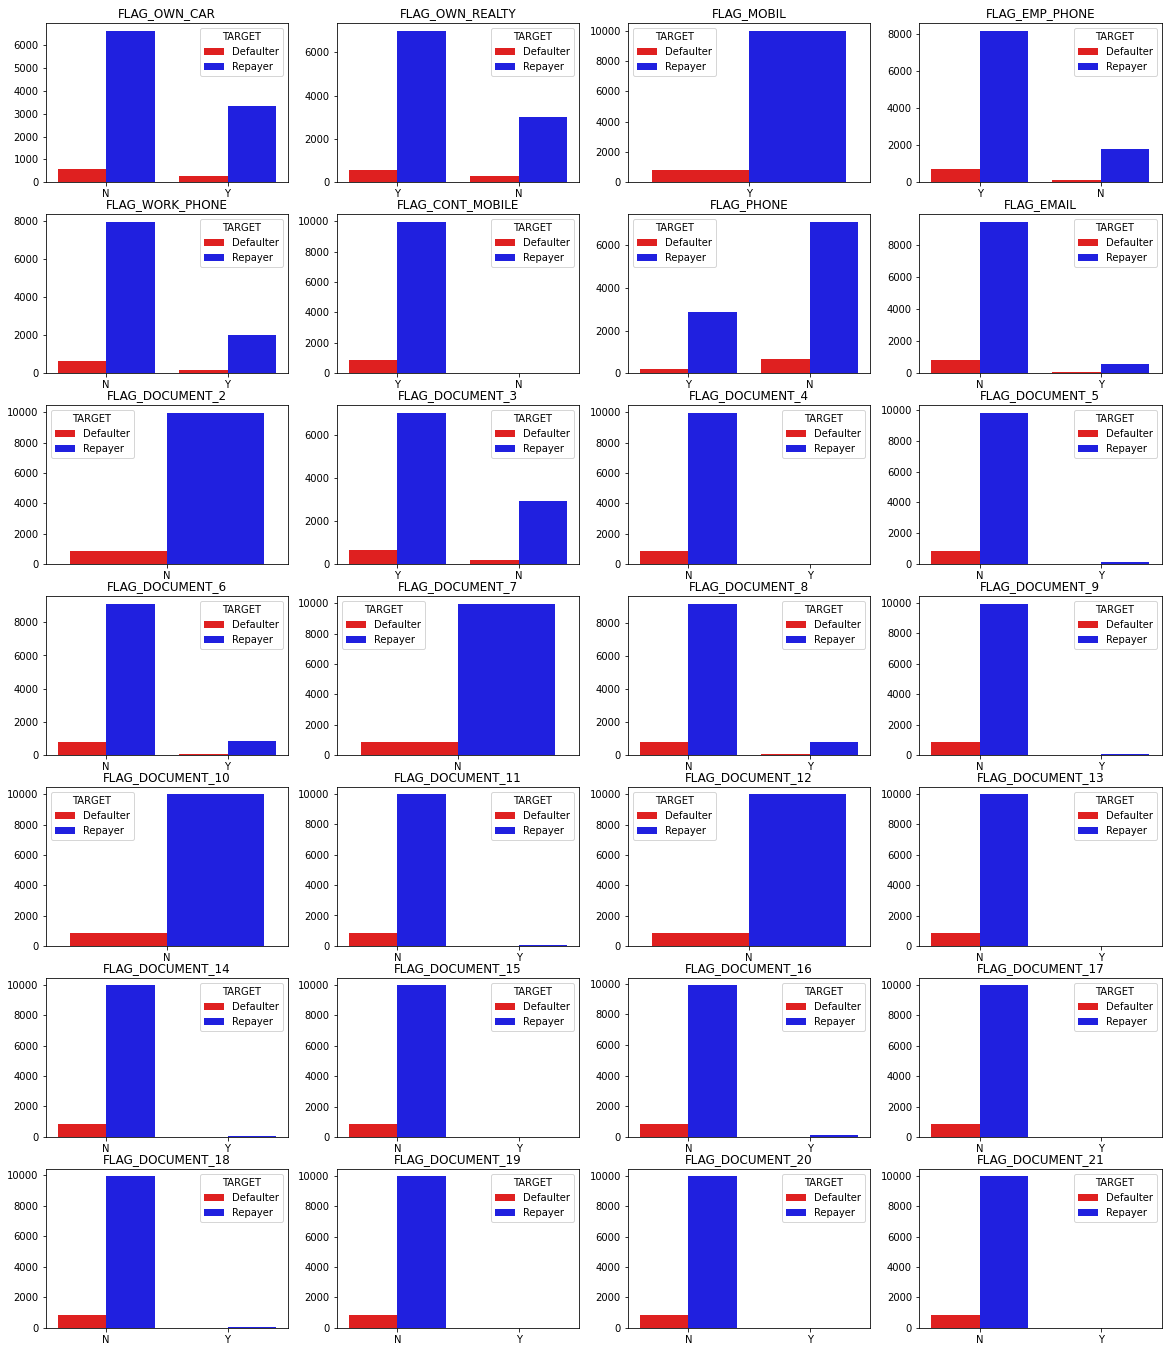

In [ ]:
import itertools # using itertools for efficient looping plotting subplots

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_columns,range(len(flag_columns))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df["TARGET"], palette = ["r","b"])
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**INSIGHT**

* **Columns (FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3) have more repayers than defaulter and from these keeping FLAG_DOCUMENT_3,FLAG_OWN_REALTY, FLAG_MOBIL more sense  thus we can include these columns and remove all other FLAG columns for furhter analysis.**

In [ ]:
# removing required columns from "flag_df" such that we can remove the irrelevent columns from "appl_data" dataset.

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [ ]:
len(flag_df.columns)

25

In [ ]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe

appl_data.drop(flag_df.columns, axis=1, inplace= True)

In [ ]:
appl_data.shape    # Now we are left 46 revelent columns

(10825, 46)

**INSIGHT**

* **After removing uneccsarry, irrelevent and missing columns. We are left with 46 columns**

## 3. Imputing values

**Now that we have removed all the unneccesarry columns, we will proced with imputing values for relevent missing columns whereever required**

In [ ]:
null_values(appl_data).head(10)

OCCUPATION_TYPE               31.07
AMT_REQ_CREDIT_BUREAU_YEAR    13.54
AMT_REQ_CREDIT_BUREAU_QRT     13.54
AMT_REQ_CREDIT_BUREAU_MON     13.54
AMT_REQ_CREDIT_BUREAU_WEEK    13.54
AMT_REQ_CREDIT_BUREAU_DAY     13.54
AMT_REQ_CREDIT_BUREAU_HOUR    13.54
DEF_60_CNT_SOCIAL_CIRCLE       0.46
OBS_30_CNT_SOCIAL_CIRCLE       0.46
DEF_30_CNT_SOCIAL_CIRCLE       0.46
dtype: float64

###  3.1 Imputing for "OCCUPATION_TYPE" column

In [ ]:
#Percentage of each category present in "OCCUPATION_TYPE"

appl_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 25.877781
Sales staff              15.692844
Core staff               13.186813
Managers                  9.541678
Drivers                   8.683999
High skill tech staff     5.400697
Accountants               4.717234
Medicine staff            4.261592
Cooking staff             2.894666
Security staff            2.881265
Cleaning staff            2.077191
Private service staff     1.380327
Low-skill Laborers        1.313321
Secretaries               0.656660
Waiters/barmen staff      0.562852
Realty agents             0.402037
HR staff                  0.268025
IT staff                  0.201018
Name: OCCUPATION_TYPE, dtype: float64

**Insight:**
* **from above it looks like this columnn is categorical one and have missing values of 31.35%. to fix this we will impute another category as "Unknown" for the missing values.**

In [ ]:
# imputing null values with "Unknown"

appl_data["OCCUPATION_TYPE"] = appl_data["OCCUPATION_TYPE"].fillna("Unknown") 

In [ ]:
appl_data["OCCUPATION_TYPE"].isnull().sum() # Now we have zero null values 

0

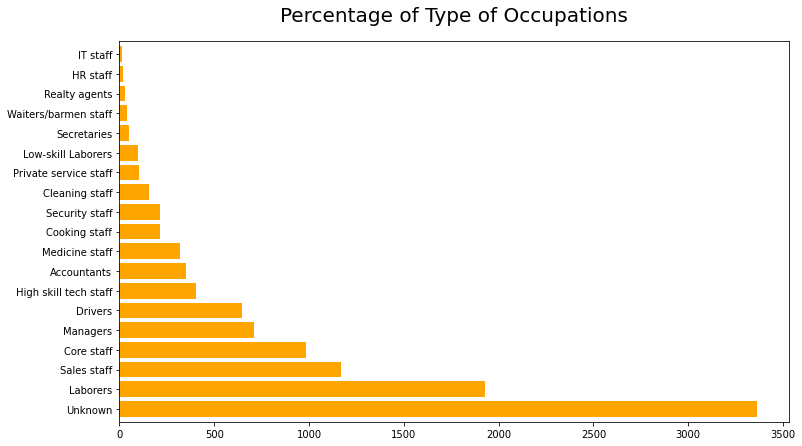

In [ ]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(appl_data["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

* **Highest percentage of values belongs to Unknown group and Secons belongs to Laborers**

### 3.2 Now let's move to other 6 columns : 

**AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"**

In [ ]:
appl_data[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000
mean,1.882893,0.268939,0.272679,0.032375,0.008334,0.007266
std,1.851267,0.611572,0.927952,0.191503,0.118474,0.088628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,8.000000,16.000000,4.000000,4.000000,2.000000


**These above columns represent number of enquries made for the customer(which should be discrete and not continous).
from above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns.**

In [ ]:
#creating "amt_credit" variable having these columns "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
#"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"

amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [ ]:
#filling missing values with median values

appl_data.fillna(appl_data[amt_credit].median(),inplace = True)

In [ ]:
null_values(appl_data).head(10)

OBS_60_CNT_SOCIAL_CIRCLE    0.46
DEF_60_CNT_SOCIAL_CIRCLE    0.46
DEF_30_CNT_SOCIAL_CIRCLE    0.46
OBS_30_CNT_SOCIAL_CIRCLE    0.46
NAME_TYPE_SUITE             0.39
AMT_GOODS_PRICE             0.07
FLAG_DOCUMENT_3             0.01
DAYS_LAST_PHONE_CHANGE      0.01
LIVE_CITY_NOT_WORK_CITY     0.00
HOUR_APPR_PROCESS_START     0.00
dtype: float64

**Still there some missing value coloumns but we will not impute them as the missing value count very less.**

## 4. Standardising values 

In [ ]:
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,10825.000000,10825.000000,10825.000000,1.082500e+04,1.082500e+04,10825.000000,1.081700e+04,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.0,10825.000000,10825.000000,10825.000000,10825.00000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10775.000000,10775.000000,10775.000000,10775.000000,10824.000000,10824.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000
mean,106310.699677,0.077598,0.417275,1.677415e+05,6.002651e+05,27068.302309,5.398798e+05,0.020879,-16009.030485,62712.135612,-4978.061247,-2983.412933,1.0,2.159815,2.047575,2.026236,12.08388,0.016536,0.049792,0.038707,0.081016,0.236305,0.181155,1.413364,0.147657,1.397865,0.103109,-961.195214,0.712676,0.006282,0.007206,0.027991,0.235751,0.232517,1.763326
std,3635.758031,0.267551,0.724541,9.596239e+04,4.033041e+05,14330.259644,3.708698e+05,0.013913,4347.809754,140365.495896,3544.675660,1511.994111,0.0,0.906958,0.509744,0.504648,3.22588,0.127530,0.217525,0.192904,0.272873,0.424831,0.385164,2.283525,0.450448,2.263449,0.370186,829.353886,0.452535,0.082445,0.110196,0.178407,0.867856,0.576049,1.747653
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,-20981.000000,-6228.000000,1.0,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103159.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16443.000000,2.385000e+05,0.010006,-19596.000000,-2811.000000,-7491.000000,-4294.000000,1.0,2.000000,2.000000,2.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,106333.000000,0.000000,0.000000,1.440000e+05,5.120640e+05,24970.500000,4.500000e+05,0.018850,-15762.000000,-1220.000000,-4473.000000,-3230.000000,1.0,2.000000,2.000000,2.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-750.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,109466.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34681.500000,6.795000e+05,0.028663,-12342.000000,-288.000000,-1971.000000,-1699.000000,1.0,3.000000,2.000000,2.000000,14.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-262.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,112602.000000,1.000000,7.000000,2.250000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.000000,0.000000,0.000000,1.0,9.000000,3.000000,3.000000,23.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,5.000000,25.000000,5.000000,0.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


**Insights:**

**from above describe result we can see that** 
* **columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.**
* **columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values. thus will correct those values**
* **convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED**

### 4.1 Taking care of columns: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE

In [ ]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount in term of Lakhs
appl_data['AMT_INCOME_TOTAL']=appl_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_INCOME_RANGE']=pd.cut(appl_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [ ]:
round((appl_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        49.96
0-1L         21.40
2L-3L        21.12
3L-4L         5.06
4L-5L         1.66
5L-6L         0.34
6L-7L         0.29
7L-8L         0.08
8L-9L         0.06
10L Above     0.02
9L-10L        0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [ ]:
# Creating bins for Credit amount in term of Lakhs
appl_data['AMT_CREDIT']=appl_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_CREDIT_RANGE']=pd.cut(appl_data['AMT_CREDIT'],bins=bins,labels=slots)

In [ ]:
round((appl_data["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        17.26
10L Above    16.53
4L-5L        10.60
5L-6L        10.60
1L-2L        10.07
3L-4L         8.59
6L-7L         7.82
8L-9L         7.06
7L-8L         6.43
9L-10L        2.94
0-1L          2.12
Name: AMT_CREDIT_RANGE, dtype: float64

In [ ]:
# Creating bins for Price of Goods in term of Lakhs
appl_data['AMT_GOODS_PRICE']=appl_data['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_GOODS_PRICE_RANGE']=pd.cut(appl_data['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [ ]:
round((appl_data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        19.82
4L-5L        17.96
6L-7L        12.97
10L Above    11.20
1L-2L        11.05
8L-9L         7.22
3L-4L         7.19
5L-6L         4.35
0-1L          3.00
9L-10L        2.72
7L-8L         2.52
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

### 4.2 Dealing with columns :

**DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE**

In [ ]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

appl_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,10825.000000,10825.000000,10825.000000,10825.000000,10824.000000
mean,-16009.030485,62712.135612,-4978.061247,-2983.412933,-961.195214
std,4347.809754,140365.495896,3544.675660,1511.994111,829.353886
min,-25160.000000,-15632.000000,-20981.000000,-6228.000000,-3983.000000
25%,-19596.000000,-2811.000000,-7491.000000,-4294.000000,-1561.000000
50%,-15762.000000,-1220.000000,-4473.000000,-3230.000000,-750.000000
75%,-12342.000000,-288.000000,-1971.000000,-1699.000000,-262.000000
max,-7705.000000,365243.000000,0.000000,0.000000,0.000000


* **from describe we get that days are in negative that is not usual, so to correct it we use absolute function as below**

In [ ]:
#using abs() function to correct the days values

appl_data[days_col]= abs(appl_data[days_col])

In [ ]:
# Data is correct now

appl_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,10825.000000,10825.000000,10825.000000,10825.000000,10824.000000
mean,16009.030485,66649.680739,4978.061247,2983.412933,961.195214
std,4347.809754,138539.010353,3544.675660,1511.994111,829.353886
min,7705.000000,17.000000,0.000000,0.000000,0.000000
25%,12342.000000,921.000000,1971.000000,1699.000000,262.000000
50%,15762.000000,2220.000000,4473.000000,3230.000000,750.000000
75%,19596.000000,5649.000000,7491.000000,4294.000000,1561.000000
max,25160.000000,365243.000000,20981.000000,6228.000000,3983.000000


### 4.3. now convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding, that is adding two more categorical column

In [ ]:
appl_data["AGE"] = appl_data["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

appl_data["AGE_GROUP"] = pd.cut(appl_data["AGE"], bins=bins, labels=slots)

In [ ]:
appl_data["AGE_GROUP"].value_counts(normalize= True)*100

40-45       13.644342
30-35       13.551963
35-40       13.219400
50-55       11.787529
45-50       11.584296
60 Above    11.334873
25-30       10.420323
55-60       10.374134
20-25        4.083141
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [ ]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

appl_data["YEARS_EMPLOYED"] = appl_data["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

appl_data["EMPLOYEMENT_YEARS"] = pd.cut(appl_data["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [ ]:
appl_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         53.861697
5-10        25.460260
10-15       11.023799
15-20        4.524023
20-25        2.604401
25-30        1.380781
30 Above     1.145038
Name: EMPLOYEMENT_YEARS, dtype: float64

## 5. Identifying Outliers

In [ ]:
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10817.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.0,10825.000000,10825.000000,10825.000000,10825.00000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10775.000000,10775.000000,10775.000000,10775.000000,10824.000000,10824.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000,10825.000000
mean,106310.699677,0.077598,0.417275,1.677415,6.002651,27068.302309,5.398798,0.020879,16009.030485,66649.680739,4978.061247,2983.412933,1.0,2.159815,2.047575,2.026236,12.08388,0.016536,0.049792,0.038707,0.081016,0.236305,0.181155,1.413364,0.147657,1.397865,0.103109,961.195214,0.712676,0.006282,0.007206,0.027991,0.235751,0.232517,1.763326,43.860357,182.601865
std,3635.758031,0.267551,0.724541,0.959624,4.033041,14330.259644,3.708698,0.013913,4347.809754,138539.010353,3544.675660,1511.994111,0.0,0.906958,0.509744,0.504648,3.22588,0.127530,0.217525,0.192904,0.272873,0.424831,0.385164,2.283525,0.450448,2.263449,0.370186,829.353886,0.452535,0.082445,0.110196,0.178407,0.867856,0.576049,1.747653,11.911808,379.558932
min,100002.000000,0.000000,0.000000,0.256500,0.450000,2596.500000,0.450000,0.000938,7705.000000,17.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.109589,0.046575
25%,103159.000000,0.000000,0.000000,1.125000,2.700000,16443.000000,2.385000,0.010006,12342.000000,921.000000,1971.000000,1699.000000,1.0,2.000000,2.000000,2.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.813699,2.523288
50%,106333.000000,0.000000,0.000000,1.440000,5.120640,24970.500000,4.500000,0.018850,15762.000000,2220.000000,4473.000000,3230.000000,1.0,2.000000,2.000000,2.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,750.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.183562,6.082192
75%,109466.000000,0.000000,1.000000,2.025000,8.086500,34681.500000,6.795000,0.028663,19596.000000,5649.000000,7491.000000,4294.000000,1.0,3.000000,2.000000,2.000000,14.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1561.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.687671,15.476712
max,112602.000000,1.000000,7.000000,22.500000,29.610000,135936.000000,29.610000,0.072508,25160.000000,365243.000000,20981.000000,6228.000000,1.0,9.000000,3.000000,3.000000,23.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,5.000000,25.000000,5.000000,3983.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000,68.931507,1000.665753


* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:**

In [ ]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

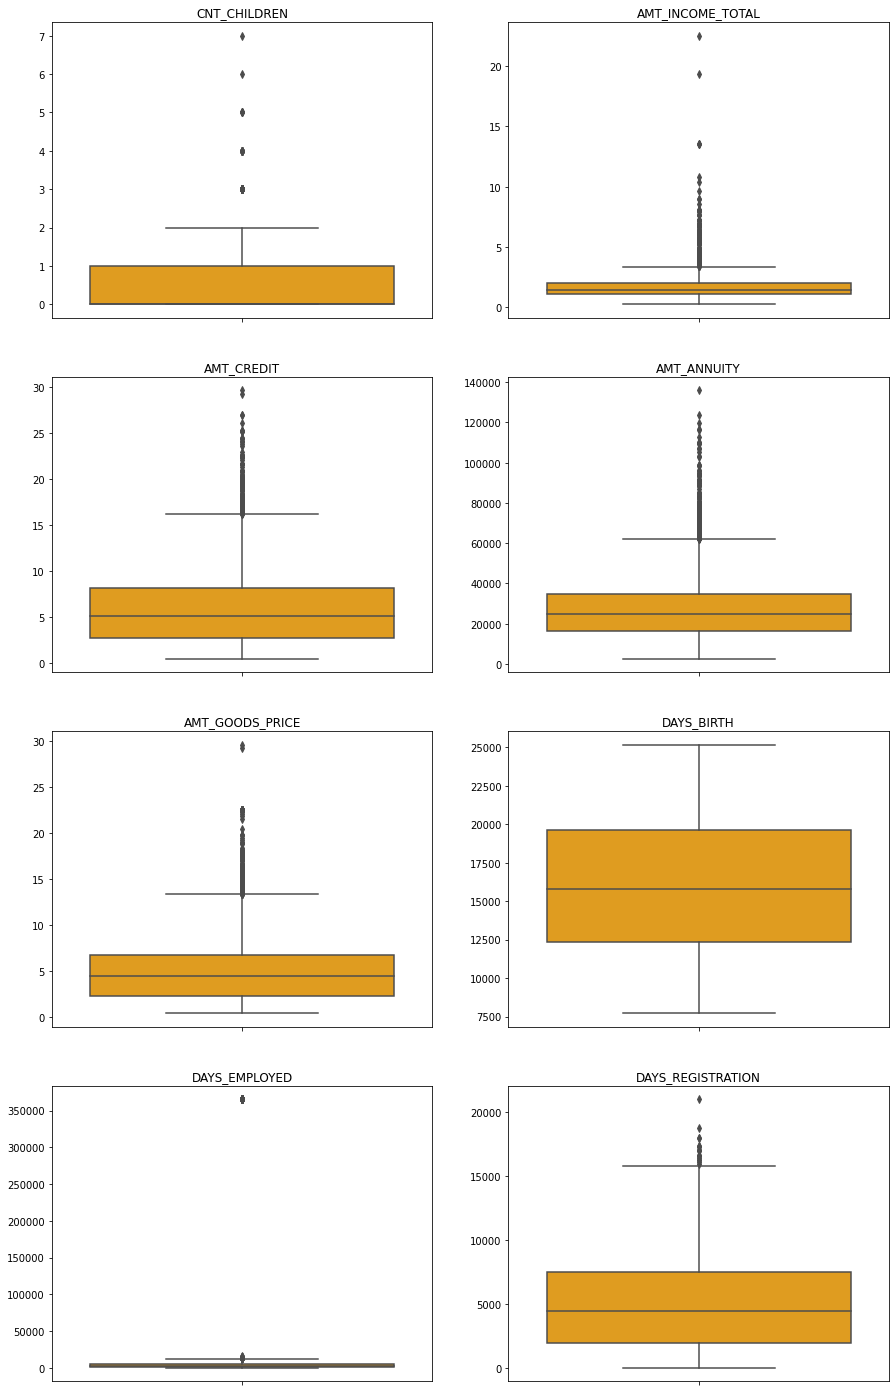

In [ ]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = appl_data[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight:**

**It can be seen that in current application data**
   * **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.**
   * **AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.**
   * **DAYS_BIRTH has no outliers which means the data available is reliable.**
   * **DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.**

In [ ]:
appl_data.nunique().sort_values()

FLAG_MOBIL                         1
LIVE_REGION_NOT_WORK_REGION        2
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_REALTY                    2
FLAG_DOCUMENT_3                    2
LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY             2
REG_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_LIVE_REGION         2
AMT_REQ_CREDIT_BUREAU_HOUR         3
REGION_RATING_CLIENT               3
REGION_RATING_CLIENT_W_CITY        3
NAME_EDUCATION_TYPE                5
AMT_REQ_CREDIT_BUREAU_DAY          5
NAME_FAMILY_STATUS                 5
AMT_REQ_CREDIT_BUREAU_WEEK         5
DEF_30_CNT_SOCIAL_CIRCLE           6
NAME_HOUSING_TYPE                  6
DEF_60_CNT_SOCIAL_CIRCLE           6
NAME_INCOME_TYPE                   6
WEEKDAY_APPR_PROCESS_START         7
EMPLOYEMENT_YEARS                  7
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_QRT          8
C

In [ ]:
#Checking the number of unique values each column possess to identify categorical columns

appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10825 entries, 0 to 10824
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   10825 non-null  int64   
 1   TARGET                       10825 non-null  int64   
 2   NAME_CONTRACT_TYPE           10825 non-null  object  
 3   CODE_GENDER                  10825 non-null  object  
 4   FLAG_OWN_REALTY              10825 non-null  object  
 5   CNT_CHILDREN                 10825 non-null  int64   
 6   AMT_INCOME_TOTAL             10825 non-null  float64 
 7   AMT_CREDIT                   10825 non-null  float64 
 8   AMT_ANNUITY                  10825 non-null  float64 
 9   AMT_GOODS_PRICE              10817 non-null  float64 
 10  NAME_TYPE_SUITE              10783 non-null  object  
 11  NAME_INCOME_TYPE             10825 non-null  object  
 12  NAME_EDUCATION_TYPE          10825 non-null  object  
 13  N

## 6. Converting Desired columns from Object to categorical column

In [ ]:
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [ ]:
#from the list, we have taken out the desired columns for conversion

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    appl_data[col] = pd.Categorical(appl_data[col])

In [ ]:
len(categorical_columns) # Converting total of 21 columns to categorical one

21

In [ ]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10825 entries, 0 to 10824
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   10825 non-null  int64   
 1   TARGET                       10825 non-null  int64   
 2   NAME_CONTRACT_TYPE           10825 non-null  category
 3   CODE_GENDER                  10825 non-null  category
 4   FLAG_OWN_REALTY              10825 non-null  category
 5   CNT_CHILDREN                 10825 non-null  category
 6   AMT_INCOME_TOTAL             10825 non-null  float64 
 7   AMT_CREDIT                   10825 non-null  float64 
 8   AMT_ANNUITY                  10825 non-null  float64 
 9   AMT_GOODS_PRICE              10817 non-null  float64 
 10  NAME_TYPE_SUITE              10783 non-null  category
 11  NAME_INCOME_TYPE             10825 non-null  category
 12  NAME_EDUCATION_TYPE          10825 non-null  category
 13  N

**Insight**
* **After imputing we have 53 columns and we will move ahead with Data Analysis on these columns**

# Dataset 2 - "previous_application.csv"

**Note: Have followed similar steps done for application_data.csv**

In [ ]:
# importing previous_application.csv

prev_appl = pd.read_csv("previous_application.csv")

In [ ]:
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,Y,1.0,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Checking rows and columns of the raw data
prev_appl.shape

(31914, 37)

In [ ]:
#Checking information of all the columns like data types
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31914 entries, 0 to 31913
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   31914 non-null  int64  
 1   SK_ID_CURR                   31913 non-null  float64
 2   NAME_CONTRACT_TYPE           31913 non-null  object 
 3   AMT_ANNUITY                  25167 non-null  float64
 4   AMT_APPLICATION              31913 non-null  float64
 5   AMT_CREDIT                   31913 non-null  float64
 6   AMT_DOWN_PAYMENT             15899 non-null  float64
 7   AMT_GOODS_PRICE              25069 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   31913 non-null  object 
 9   HOUR_APPR_PROCESS_START      31913 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  31913 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       31913 non-null  float64
 12  RATE_DOWN_PAYMENT            15899 non-null  float64
 13  RATE_INTEREST_PR

* **There are 37 columns having various data types like object, int, float and 31914 rows.**

In [ ]:
# Checking the numeric variables of the dataframes
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,3.191400e+04,31913.000000,25167.000000,3.191300e+04,3.191300e+04,15899.000000,2.506900e+04,31913.000000,31913.000000,15899.000000,101.000000,101.000000,31913.000000,3.191300e+04,25167.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000
mean,1.920934e+06,279095.618839,15489.850913,1.690678e+05,1.888048e+05,6535.747367,2.152640e+05,12.475856,0.996772,0.079611,0.199925,0.778280,-903.169523,4.646303e+02,15.551556,344785.414001,13876.491965,30861.055102,74929.505348,79899.568662,0.320728
std,5.357316e+05,102763.027645,14449.211280,2.824572e+05,3.096495e+05,15887.830828,3.027408e+05,3.334385,0.056720,0.108600,0.107392,0.098183,787.378240,2.243460e+04,13.986095,84105.443191,72572.601290,102724.114574,148479.910965,151928.745186,0.466768
min,1.000009e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.059135,0.424419,-2922.000000,-1.000000e+00,0.000000,-2903.000000,-2891.000000,-2800.000000,-2829.000000,-2807.000000,0.000000
25%,1.456134e+06,189948.000000,6151.567500,2.204550e+04,2.603250e+04,0.000000,4.950000e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1344.000000,-1.000000e+00,6.000000,365243.000000,-1647.000000,-1282.000000,-1347.500000,-1306.000000,0.000000
50%,1.919342e+06,278915.000000,10879.695000,7.195050e+04,7.927200e+04,1554.300000,1.040895e+05,12.000000,1.000000,0.049536,0.189136,0.835095,-602.000000,1.200000e+01,12.000000,365243.000000,-823.000000,-372.000000,-542.000000,-507.000000,0.000000
75%,2.387189e+06,368763.000000,19703.407500,1.800000e+05,1.976670e+05,7983.000000,2.250000e+05,15.000000,1.000000,0.108909,0.193330,0.852537,-294.000000,1.000000e+02,18.000000,365243.000000,-410.000000,106.000000,-82.000000,-52.000000,1.000000
max,2.845367e+06,456254.000000,210115.485000,3.150000e+06,4.104351e+06,509850.000000,3.150000e+06,23.000000,1.000000,0.944776,0.696178,0.867336,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**Insight**

* **there are 37 columns and 31914 rows.**
* **there columns having negative, postive values which includes days. fixing is required**

In [ ]:
#checking how many null values are present in each of the columns in percentage
null_values(prev_appl)

RATE_INTEREST_PRIVILEGED       99.68
RATE_INTEREST_PRIMARY          99.68
RATE_DOWN_PAYMENT              50.18
AMT_DOWN_PAYMENT               50.18
NAME_TYPE_SUITE                48.42
NFLAG_INSURED_ON_APPROVAL      38.19
DAYS_FIRST_DRAWING             38.19
DAYS_FIRST_DUE                 38.19
DAYS_LAST_DUE_1ST_VERSION      38.19
DAYS_LAST_DUE                  38.19
DAYS_TERMINATION               38.19
AMT_GOODS_PRICE                21.45
AMT_ANNUITY                    21.14
CNT_PAYMENT                    21.14
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PAYMENT_TYPE               0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [ ]:
#creating a variable p_null_col_50 for storing null columns having missing values more than 50%

p_null_col_50 = null_values(prev_appl)[null_values(prev_appl)>50]

In [ ]:
p_null_col_50 # There only 4 columns with missing valus more than 50%

RATE_INTEREST_PRIVILEGED    99.68
RATE_INTEREST_PRIMARY       99.68
RATE_DOWN_PAYMENT           50.18
AMT_DOWN_PAYMENT            50.18
dtype: float64

In [ ]:
#dropping null columns having missing values more than 50%

prev_appl.drop(columns = p_null_col_50.index, inplace = True)

In [ ]:
#creating a variable p_null_col_15 for storing null columns having missing values more than 15%

p_null_col_15 = null_values(prev_appl)[null_values(prev_appl)>15]

In [ ]:
p_null_col_15

NAME_TYPE_SUITE              48.42
DAYS_FIRST_DRAWING           38.19
DAYS_TERMINATION             38.19
DAYS_LAST_DUE                38.19
DAYS_LAST_DUE_1ST_VERSION    38.19
DAYS_FIRST_DUE               38.19
NFLAG_INSURED_ON_APPROVAL    38.19
AMT_GOODS_PRICE              21.45
AMT_ANNUITY                  21.14
CNT_PAYMENT                  21.14
dtype: float64

In [ ]:
prev_appl[p_null_col_15.index]

,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,NaN,365243.0,-37.0,-42.0,300.0,-42.0,0.0,17145.0,1730.430,12.0
1,Unaccompanied,365243.0,365243.0,365243.0,916.0,-134.0,1.0,607500.0,25188.615,36.0
2,"Spouse, partner",365243.0,365243.0,365243.0,59.0,-271.0,1.0,112500.0,15060.735,12.0
3,NaN,365243.0,-177.0,-182.0,-152.0,-482.0,1.0,450000.0,47041.335,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0
...,...,...,...,...,...,...,...,...,...,...
31909,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,202500.0,13288.050,24.0
31910,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,202500.0,10125.000,0.0
31911,NaN,365243.0,365243.0,365243.0,365243.0,365243.0,0.0,NaN,22500.000,0.0
31912,Unaccompanied,365243.0,-2287.0,-2293.0,-2023.0,-2533.0,1.0,180000.0,16118.370,18.0


In [ ]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [ ]:
# Listing down columns which are not needed
Unnecessary_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

prev_appl.drop(Unnecessary_prev,axis =1, inplace = True)

prev_appl.shape

(31914, 29)

In [ ]:
# IMputing values "Unknown" as this a categorical column
prev_appl["NAME_TYPE_SUITE"] = prev_appl["NAME_TYPE_SUITE"].fillna("Unknown")

null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    38.19
DAYS_TERMINATION             38.19
DAYS_LAST_DUE                38.19
DAYS_LAST_DUE_1ST_VERSION    38.19
DAYS_FIRST_DUE               38.19
DAYS_FIRST_DRAWING           38.19
AMT_GOODS_PRICE              21.45
AMT_ANNUITY                  21.14
CNT_PAYMENT                  21.14
PRODUCT_COMBINATION           0.02
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_CREDIT                    0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_TYPE_SUITE               0.00
SK_ID_PREV          

* **There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns count days thus will keeping null values as they are** 

In [ ]:
#Analying numerical columns using describe 

prev_appl[p_null_col_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,2.506900e+04,25167.000000,25167.000000
mean,344785.414001,79899.568662,74929.505348,30861.055102,13876.491965,0.320728,2.152640e+05,15489.850913,15.551556
std,84105.443191,151928.745186,148479.910965,102724.114574,72572.601290,0.466768,3.027408e+05,14449.211280,13.986095
min,-2903.000000,-2807.000000,-2829.000000,-2800.000000,-2891.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,365243.000000,-1306.000000,-1347.500000,-1282.000000,-1647.000000,0.000000,4.950000e+04,6151.567500,6.000000
50%,365243.000000,-507.000000,-542.000000,-372.000000,-823.000000,0.000000,1.040895e+05,10879.695000,12.000000
75%,365243.000000,-52.000000,-82.000000,106.000000,-410.000000,1.000000,2.250000e+05,19703.407500,18.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.150000e+06,210115.485000,60.000000


In [ ]:
# To convert negative days to postive days creating a varaible "p_days_col"

p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

prev_appl[p_days_col].describe() # Analysis before conversion

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,31913.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000
mean,-903.169523,344785.414001,13876.491965,30861.055102,74929.505348,79899.568662
std,787.378240,84105.443191,72572.601290,102724.114574,148479.910965,151928.745186
min,-2922.000000,-2903.000000,-2891.000000,-2800.000000,-2829.000000,-2807.000000
25%,-1344.000000,365243.000000,-1647.000000,-1282.000000,-1347.500000,-1306.000000
50%,-602.000000,365243.000000,-823.000000,-372.000000,-542.000000,-507.000000
75%,-294.000000,365243.000000,-410.000000,106.000000,-82.000000,-52.000000
max,-2.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [ ]:
# Converting Negative days to positive days

prev_appl[p_days_col] = abs(prev_appl[p_days_col])

prev_appl[p_null_col_15.index].describe() # analysing after conversion

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,2.506900e+04,25167.000000,25167.000000
mean,344893.794698,81439.078978,76522.197394,32287.228773,16006.521265,0.320728,2.152640e+05,15489.850913,15.551556
std,83659.870141,151109.061640,147665.350741,102284.792270,72132.707820,0.466768,3.027408e+05,14449.211280,13.986095
min,3.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,365243.000000,445.000000,452.000000,251.000000,474.500000,0.000000,4.950000e+04,6151.567500,6.000000
50%,365243.000000,1166.000000,1149.000000,718.000000,912.000000,0.000000,1.040895e+05,10879.695000,12.000000
75%,365243.000000,2473.000000,2409.500000,1737.000000,1847.500000,1.000000,2.250000e+05,19703.407500,18.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.150000e+06,210115.485000,60.000000


In [ ]:
#days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
prev_appl['YEARLY_DECISION'] = pd.cut(prev_appl['DAYS_DECISION'],bins,labels=slots)

In [ ]:
prev_appl['YEARLY_DECISION'].value_counts(normalize=True)*100

1          32.936421
2          23.491994
3          13.044841
4           7.667722
5           6.339109
7           6.050826
7 above     5.508727
6           4.960361
Name: YEARLY_DECISION, dtype: float64

**Insight:**
* **Almost 35% loan applicatants have applied for a new loan within 1 year of previous loan decision**

In [ ]:
prev_appl.nunique()

SK_ID_PREV                   31914
SK_ID_CURR                   29448
NAME_CONTRACT_TYPE               4
AMT_ANNUITY                  19261
AMT_APPLICATION               9745
AMT_CREDIT                   13659
AMT_GOODS_PRICE               9745
NAME_CASH_LOAN_PURPOSE          24
NAME_CONTRACT_STATUS             4
DAYS_DECISION                 2910
NAME_PAYMENT_TYPE                4
CODE_REJECT_REASON               9
NAME_TYPE_SUITE                  8
NAME_CLIENT_TYPE                 4
NAME_GOODS_CATEGORY             26
NAME_PORTFOLIO                   5
NAME_PRODUCT_TYPE                3
CHANNEL_TYPE                     8
SELLERPLACE_AREA              1043
NAME_SELLER_INDUSTRY            11
CNT_PAYMENT                     27
NAME_YIELD_GROUP                 5
PRODUCT_COMBINATION             17
DAYS_FIRST_DRAWING             775
DAYS_FIRST_DUE                2859
DAYS_LAST_DUE_1ST_VERSION     2679
DAYS_LAST_DUE                 2704
DAYS_TERMINATION              2607
NFLAG_INSURED_ON_APP

In [ ]:
null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    38.19
DAYS_TERMINATION             38.19
DAYS_LAST_DUE                38.19
DAYS_LAST_DUE_1ST_VERSION    38.19
DAYS_FIRST_DUE               38.19
DAYS_FIRST_DRAWING           38.19
AMT_GOODS_PRICE              21.45
AMT_ANNUITY                  21.14
CNT_PAYMENT                  21.14
PRODUCT_COMBINATION           0.02
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
YEARLY_DECISION               0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_CREDIT                    0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_TYPE_SUITE     

#### Now dealing with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE" 
#### To impute null values in continuous variables, we plotted the distribution of the columns and used
* **median if the distribution is skewed**
* **mode if the distribution pattern is preserved.**

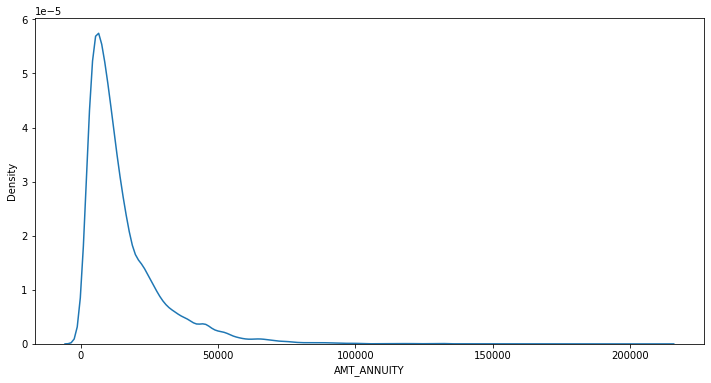

In [ ]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(prev_appl['AMT_ANNUITY'])
plt.show()

**Insight:**
* **There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.**

In [ ]:
#imputing missing values with median 

prev_appl['AMT_ANNUITY'].fillna(prev_appl['AMT_ANNUITY'].median(),inplace = True)

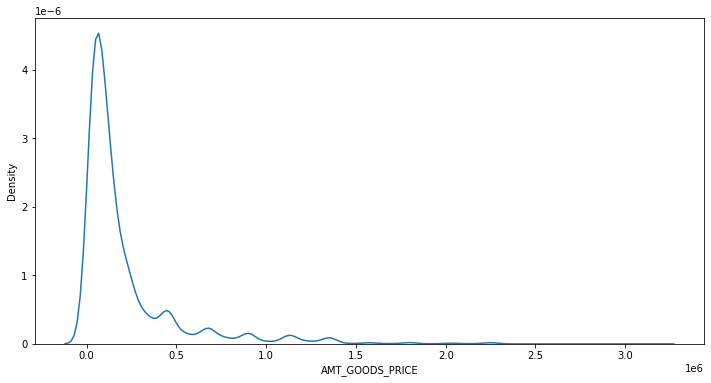

In [ ]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(prev_appl['AMT_GOODS_PRICE'])
plt.show()

* **There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.**

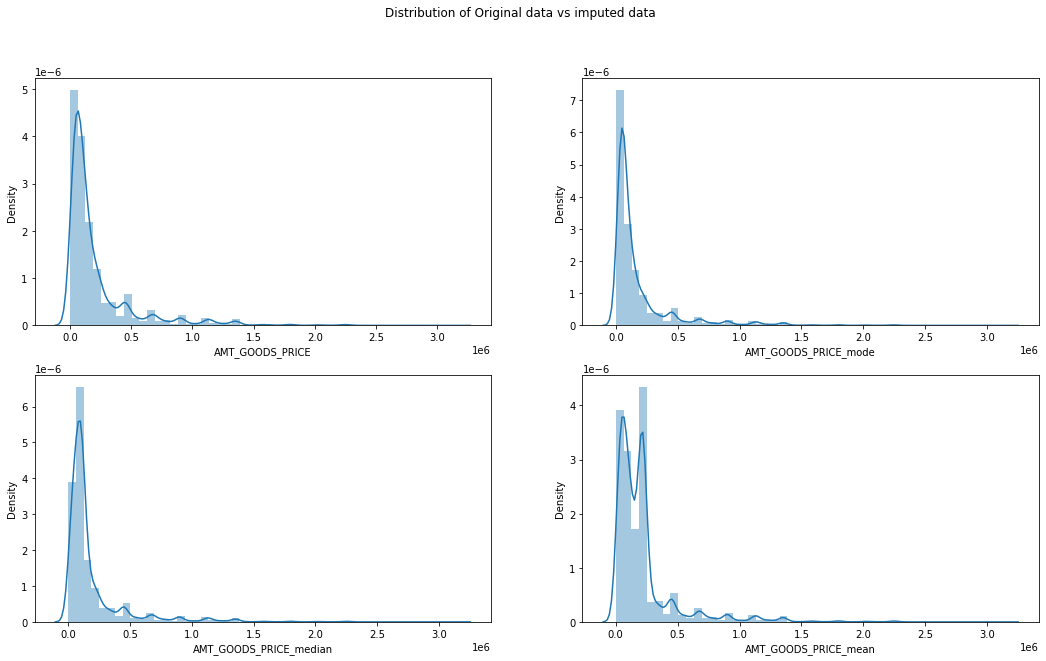

In [ ]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame() 
statsDF['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_appl['AMT_GOODS_PRICE'][pd.notnull(prev_appl['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])


* **The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values**

In [ ]:
# Imputing null values with mode

prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0], inplace=True)

 Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [ ]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

prev_appl.loc[prev_appl['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        5412
Refused          811
Unused offer     523
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
#imputing null values as 0

prev_appl['CNT_PAYMENT'].fillna(0,inplace = True)

In [ ]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'], dtype='object')

In [ ]:
#Converting required categoical columns from Object to categorical 

p_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in p_catgorical_col:
    prev_appl[col] =pd.Categorical(prev_appl[col])

Finding outliers

In [ ]:
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,3.191400e+04,31913.000000,31914.000000,3.191300e+04,3.191300e+04,2.506900e+04,31913.000000,3.191300e+04,31914.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000
mean,1.920934e+06,279095.618839,14515.209002,1.690678e+05,1.888048e+05,2.152640e+05,903.169523,4.646303e+02,12.263771,344893.794698,16006.521265,32287.228773,76522.197394,81439.078978,0.320728
std,5.357316e+05,102763.027645,12968.548120,2.824572e+05,3.096495e+05,3.027408e+05,787.378240,2.243460e+04,13.949086,83659.870141,72132.707820,102284.792270,147665.350741,151109.061640,0.466768
min,1.000009e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,-1.000000e+00,0.000000,3.000000,3.000000,0.000000,2.000000,2.000000,0.000000
25%,1.456134e+06,189948.000000,7198.841250,2.204550e+04,2.603250e+04,4.950000e+04,294.000000,-1.000000e+00,0.000000,365243.000000,474.500000,251.000000,452.000000,445.000000,0.000000
50%,1.919342e+06,278915.000000,10879.695000,7.195050e+04,7.927200e+04,1.040895e+05,602.000000,1.200000e+01,10.000000,365243.000000,912.000000,718.000000,1149.000000,1166.000000,0.000000
75%,2.387189e+06,368763.000000,16284.048750,1.800000e+05,1.976670e+05,2.250000e+05,1344.000000,1.000000e+02,14.000000,365243.000000,1847.500000,1737.000000,2409.500000,2473.000000,1.000000
max,2.845367e+06,456254.000000,210115.485000,3.150000e+06,4.104351e+06,3.150000e+06,2922.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below**

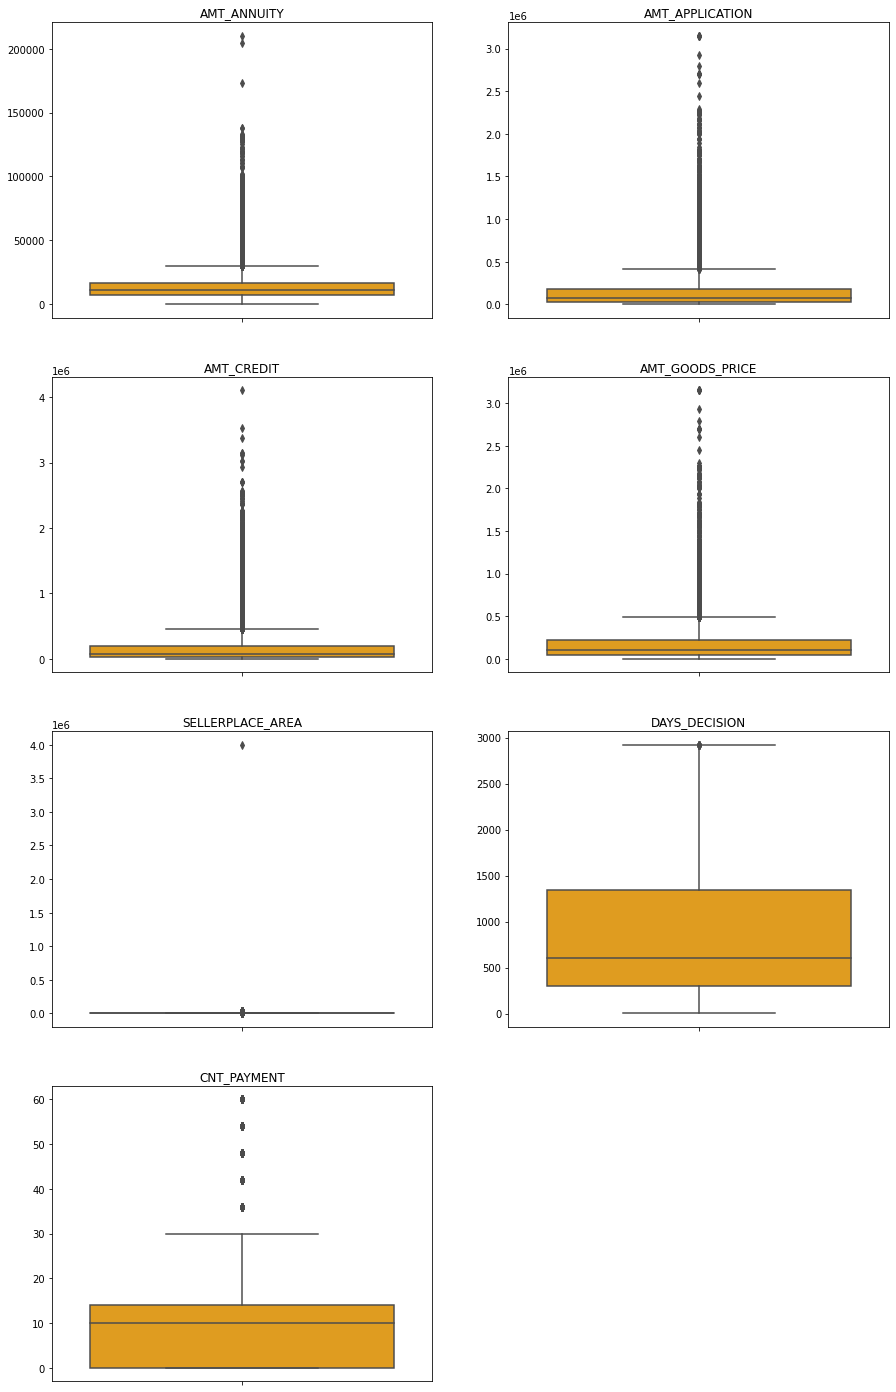

In [ ]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = prev_appl[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight:**

**It can be seen that in previous application data**
* **AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.**
* **CNT_PAYMENT has few outlier values.**
* **DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.**

## 6.1 Imbalance Data

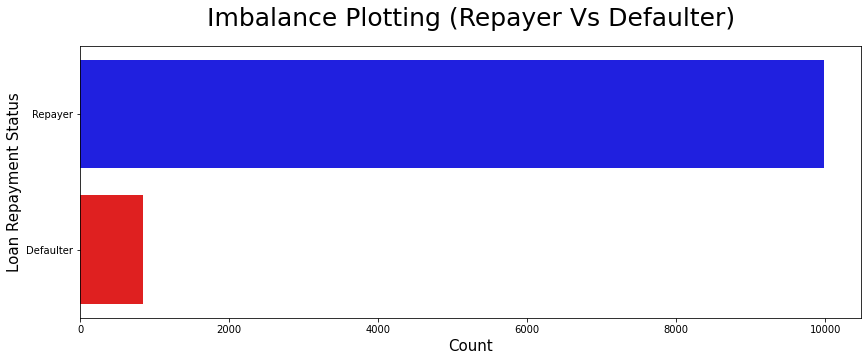

In [ ]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = appl_data["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [ ]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below 
repayer = round((appl_data["TARGET"].value_counts()[0]/len(appl_data)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((appl_data["TARGET"].value_counts()[1]/len(appl_data)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 92.24%
Defaulter Percentage is 7.76%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.89/1 (approx)


6.2 Plotting Functions

Creating a function for plotting Variables to do univariate analysis.
This function will create two plots
1. Count plot of given column w.r.t TARGET column
2. Percentage of defaulters within that column

The function is taking 6 arguments
1. dataset : to put the dataset we want to use
2. col : column name for which we need to the analysis
3. target_col : column name for with which we will be comparing
4. ylog : to have y-axis in log10 terms, in case the plot is not readable
5. x_label_angle : to maintain the orientation of x-axis labels
6. h_layout : to give horizontal layout of the subplots

In [ ]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [ ]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

In [ ]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()
    

In [ ]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

In [ ]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [ ]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(appl_data.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(appl_data.select_dtypes(["int","float"]).columns)  #N Numerical Column list

## 6.3 Categorical Variables Analysis

### 6.3.1 Segmented Univariate Analysis

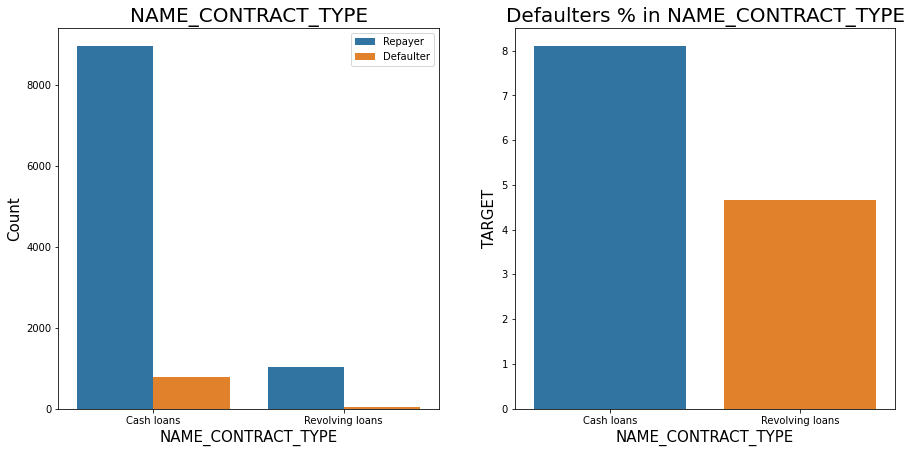

In [ ]:
#1 Checking the contract type based on loan repayment status
univariate(appl_data,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

**Inferences: Contract type**
* **Revolving loans are just a small fraction (10%) from the total number of loans**
* **Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters**

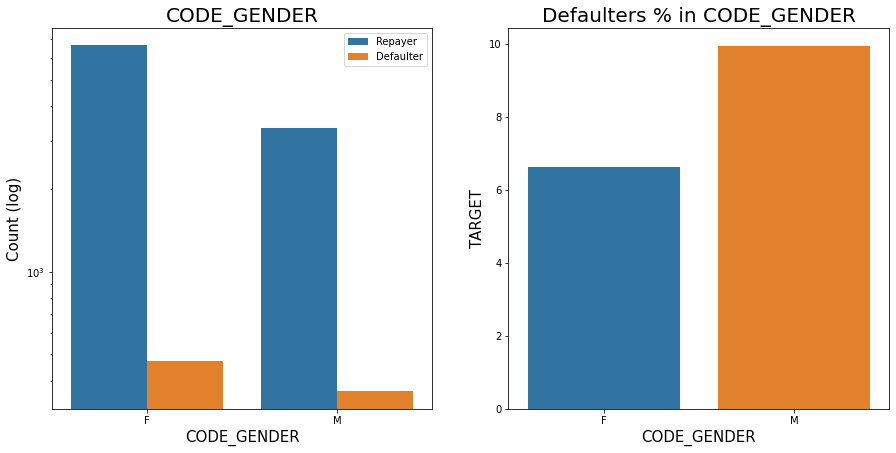

In [ ]:
#2 Checking the type of Gender on loan repayment status
univariate(appl_data,"CODE_GENDER","TARGET",True,False,True)

**Inferences: Gender Type**
* **The number of female clients is almost double the number of male clients.**
* **Based on the percentage of defaulted credits, males have a higher chance of not returning their loans about 10%, comparing with women about 7%**

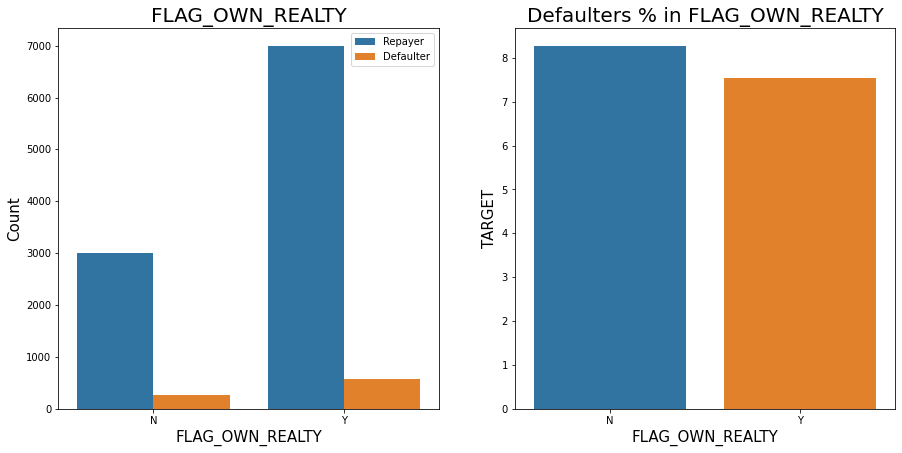

In [ ]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(appl_data,"FLAG_OWN_REALTY","TARGET",False,False,True)

**Inferences:**
* **The clients who own real estate are more than double of the ones that don't own.**
* **The defaulting rate of both categories are around the same (~8%). Thus we can infer that there is no correlation between owning a reality and defaulting the loan.**

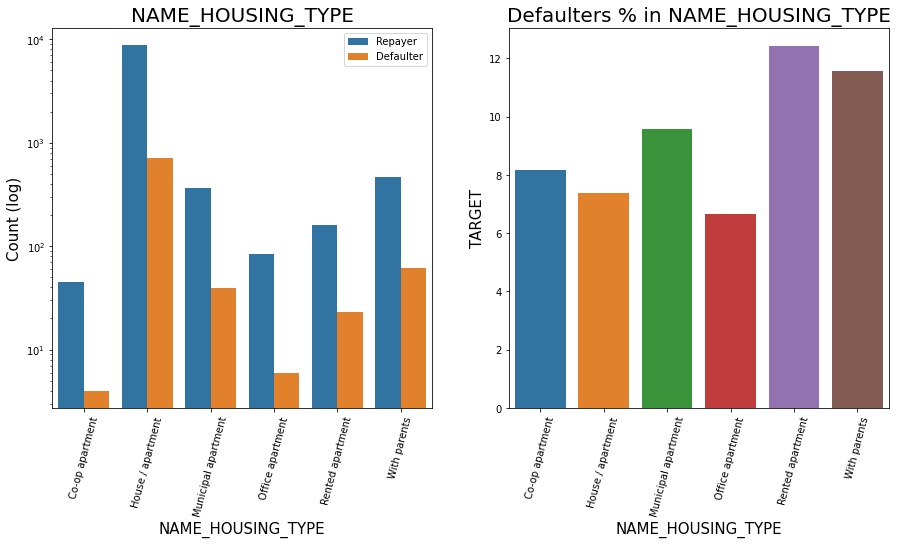

In [ ]:
#4 Analyzing Housing Type based on loan repayment status
univariate(appl_data,"NAME_HOUSING_TYPE","TARGET",True,True,True)

**Inferences: Applicant House type**
* **Majority of people live in House/apartment**
* **People living in office apartments have lowest default rate**
* **People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting**

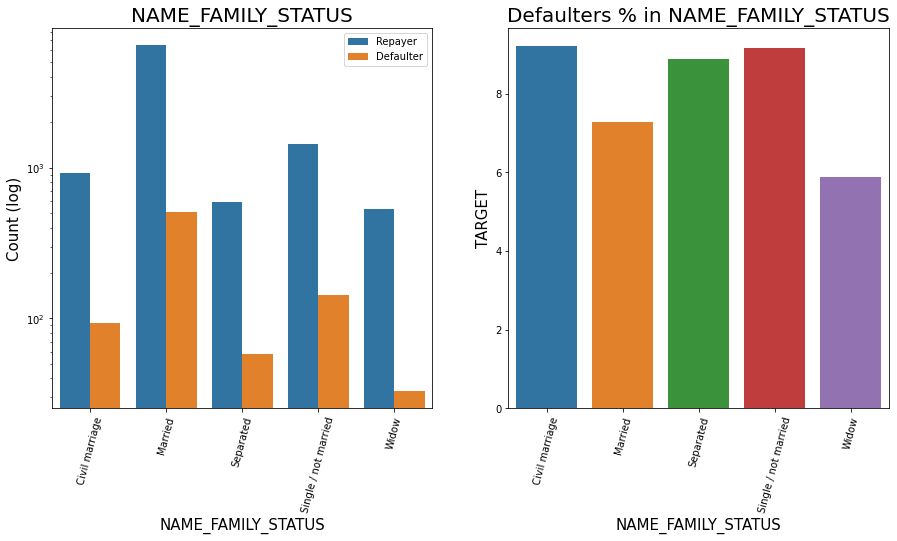

In [ ]:
#5 Analyzing Family status based on loan repayment status
univariate(appl_data,"NAME_FAMILY_STATUS","TARGET",True,True,True)

**Inferences:**
* **Most of the people who have taken loan are married, followed by Single/not married and civil marriage**
* **In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).**

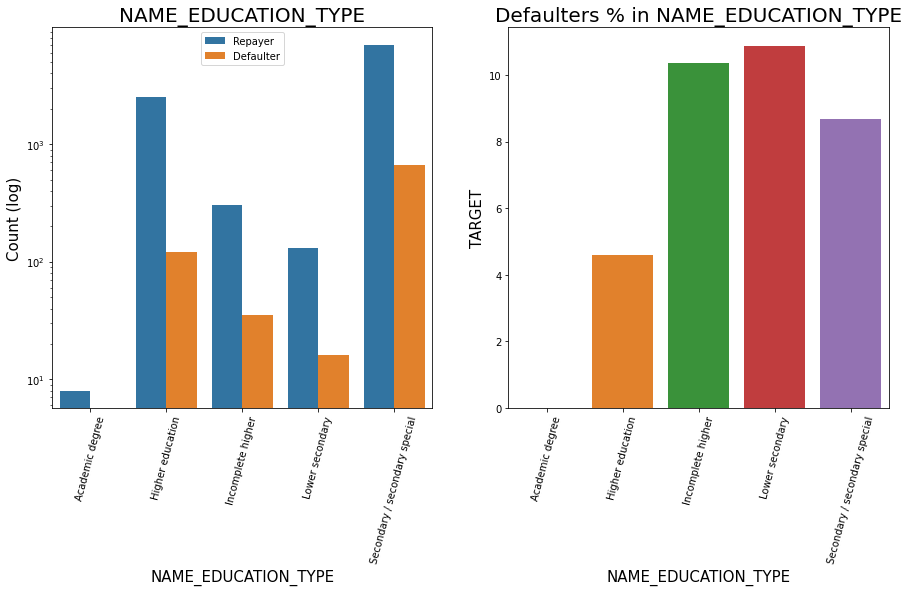

In [ ]:
#6 Analyzing Education Type based on loan repayment status
univariate(appl_data,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

**Inferences: Education Type**
* **Majority of clients have Secondary/secondary special education, followed by clients with Higher education.**
* **Very few clients have an academic degree**
* **Lower secondary category have highest rate of defaulting around 11%.**
* **People with Academic degree are least likely to default.**

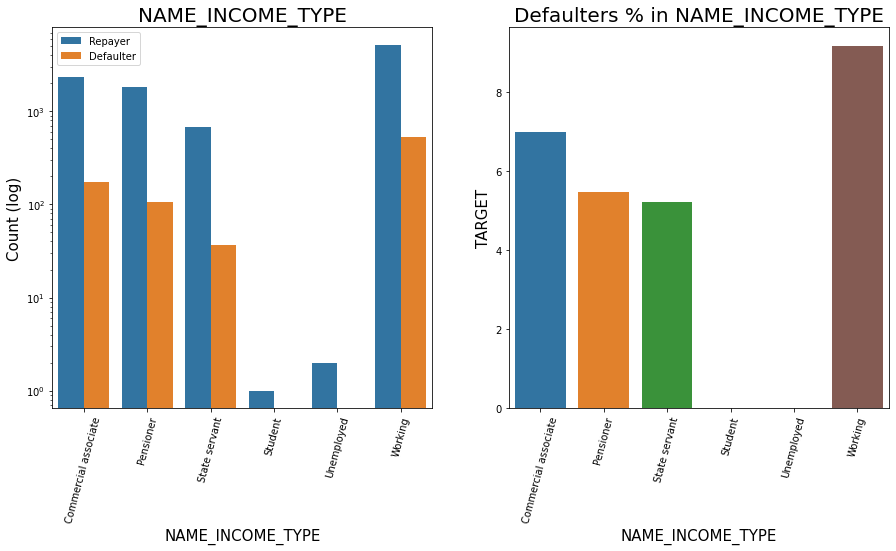

In [ ]:
#7 Analyzing Income Type based on loan repayment status
univariate(appl_data,"NAME_INCOME_TYPE","TARGET",True,True,True)

**Inferences:**
* **Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.**
* **The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%). The rest under average around 10% defaultees.**
* **Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.**

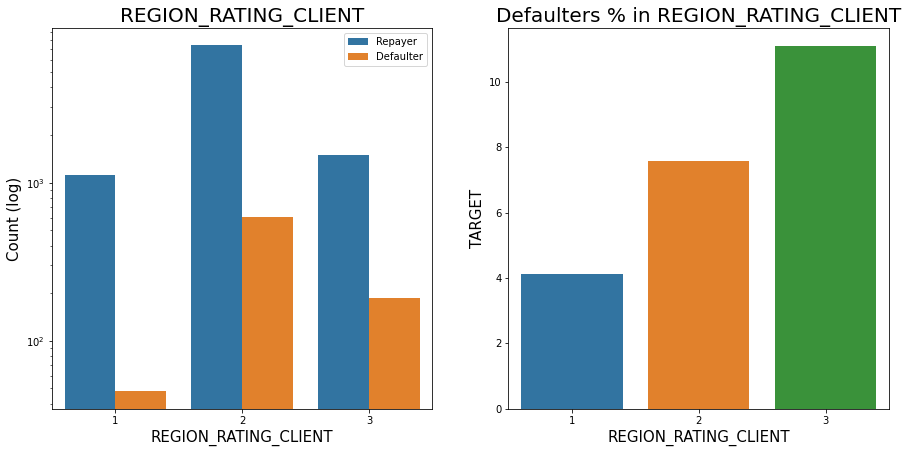

In [ ]:
#8 Analyzing Region rating where applicant lives based on loan repayment status
univariate(appl_data,"REGION_RATING_CLIENT","TARGET",True,False,True)

**Inferences:Client Region Rating**
* **Most of the applicants are living in Region with Rating 2 place.**
* **Region Rating 3 has the highest default rate (11%)**
* **Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans**

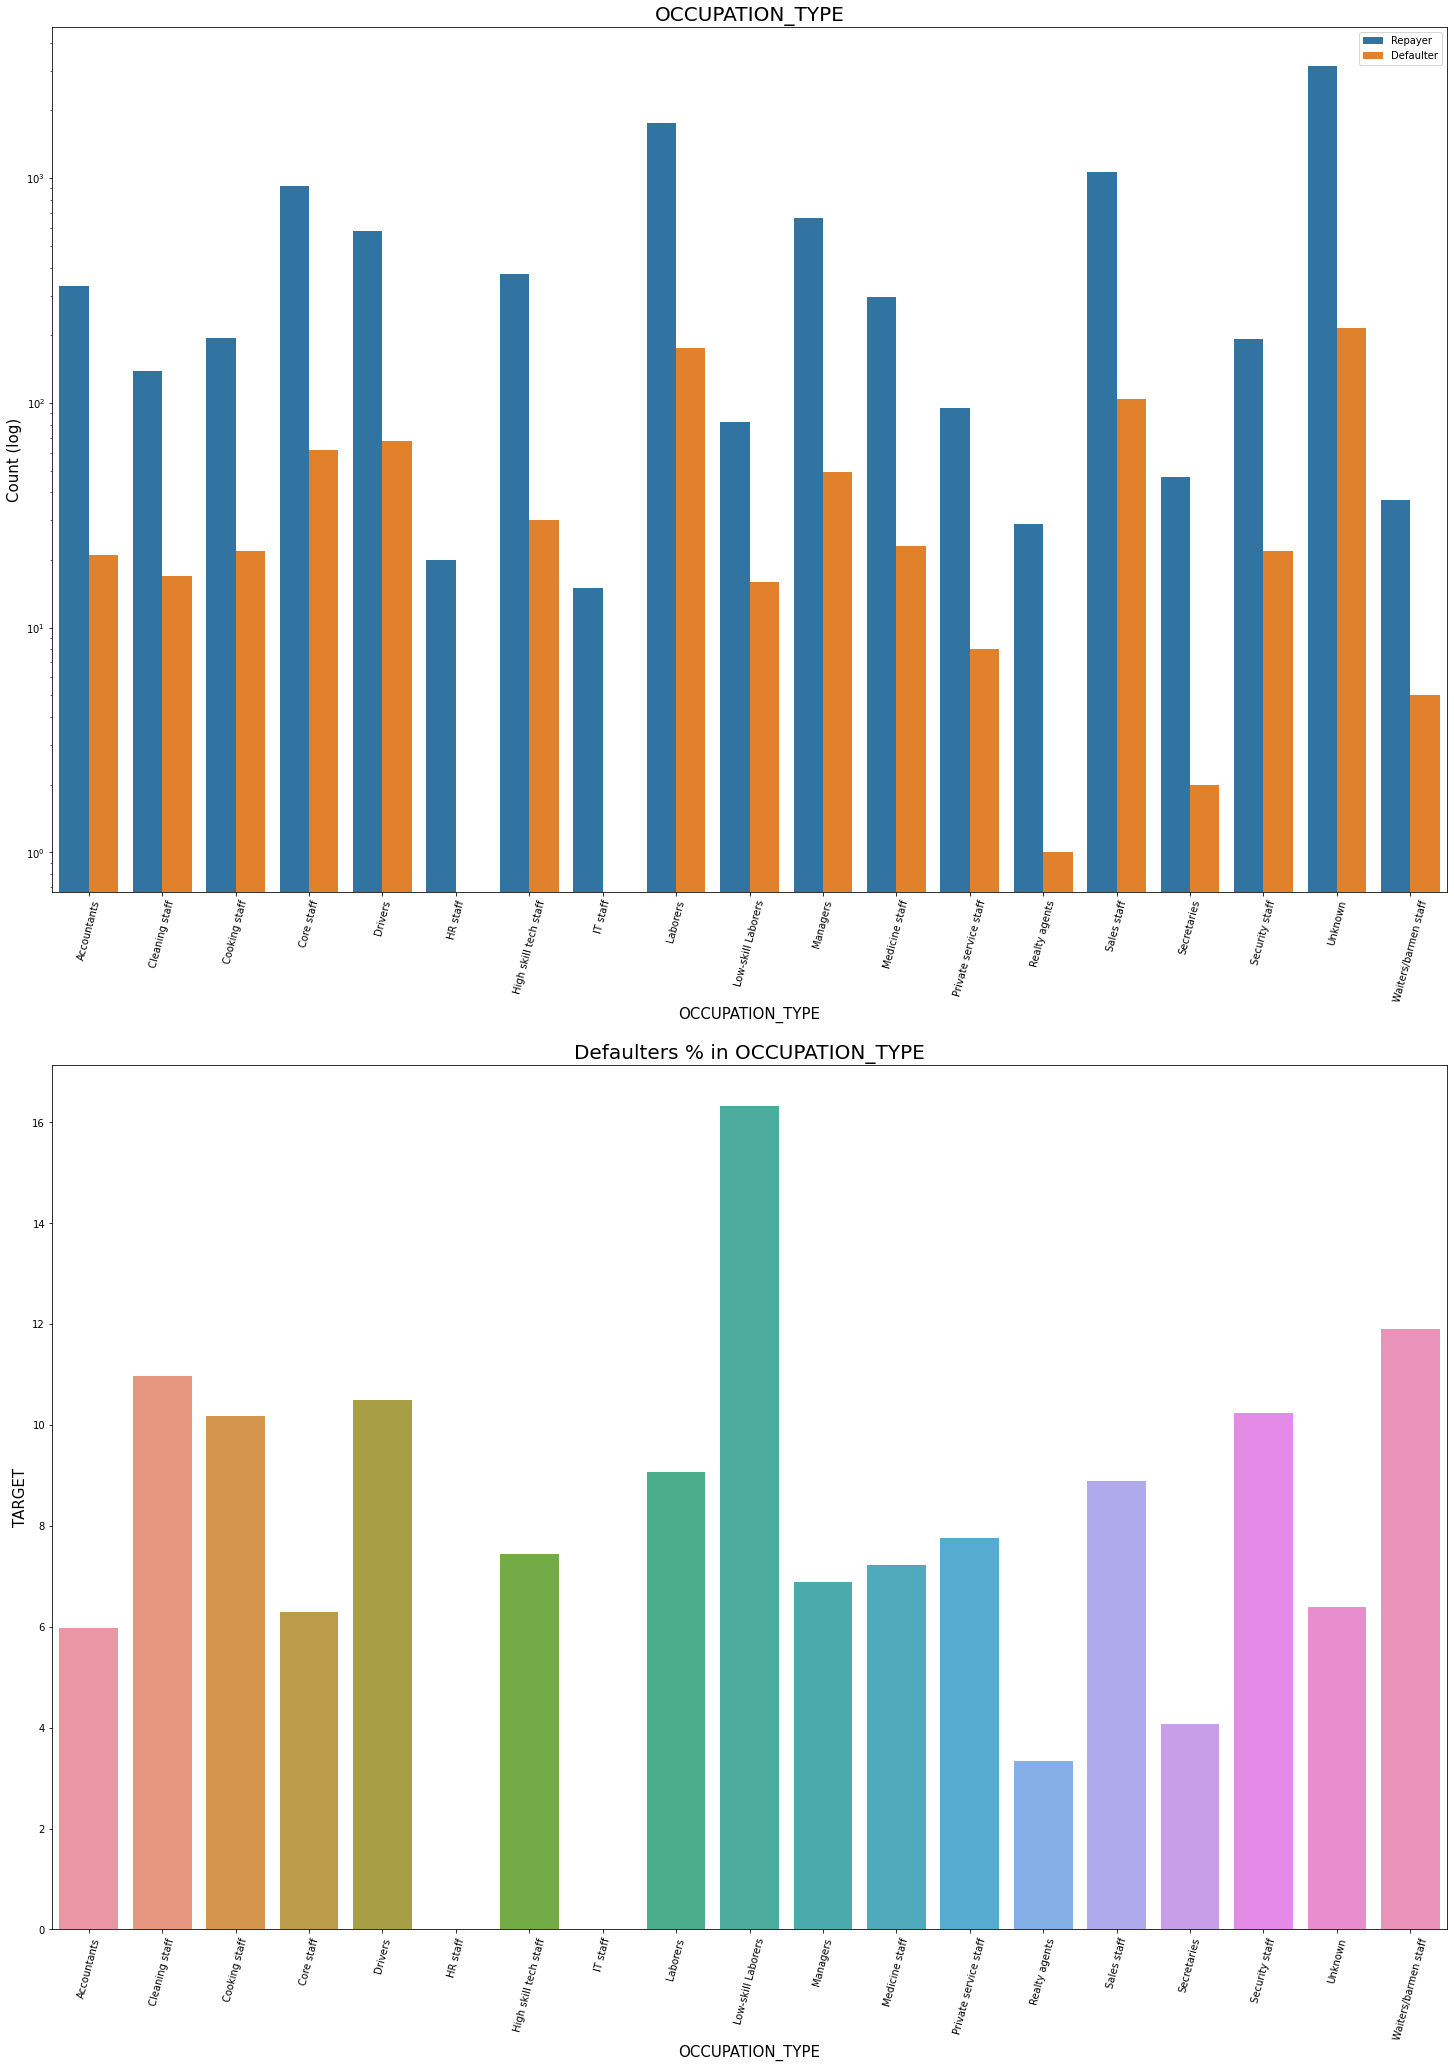

In [ ]:
#9 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(appl_data,"OCCUPATION_TYPE","TARGET",True,True,False)

**Inferences:**
* **Most of the loans are taken by Laborers, followed by Sales staff.**
* **IT staff are less likely to apply for Loan.**
* **Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff**

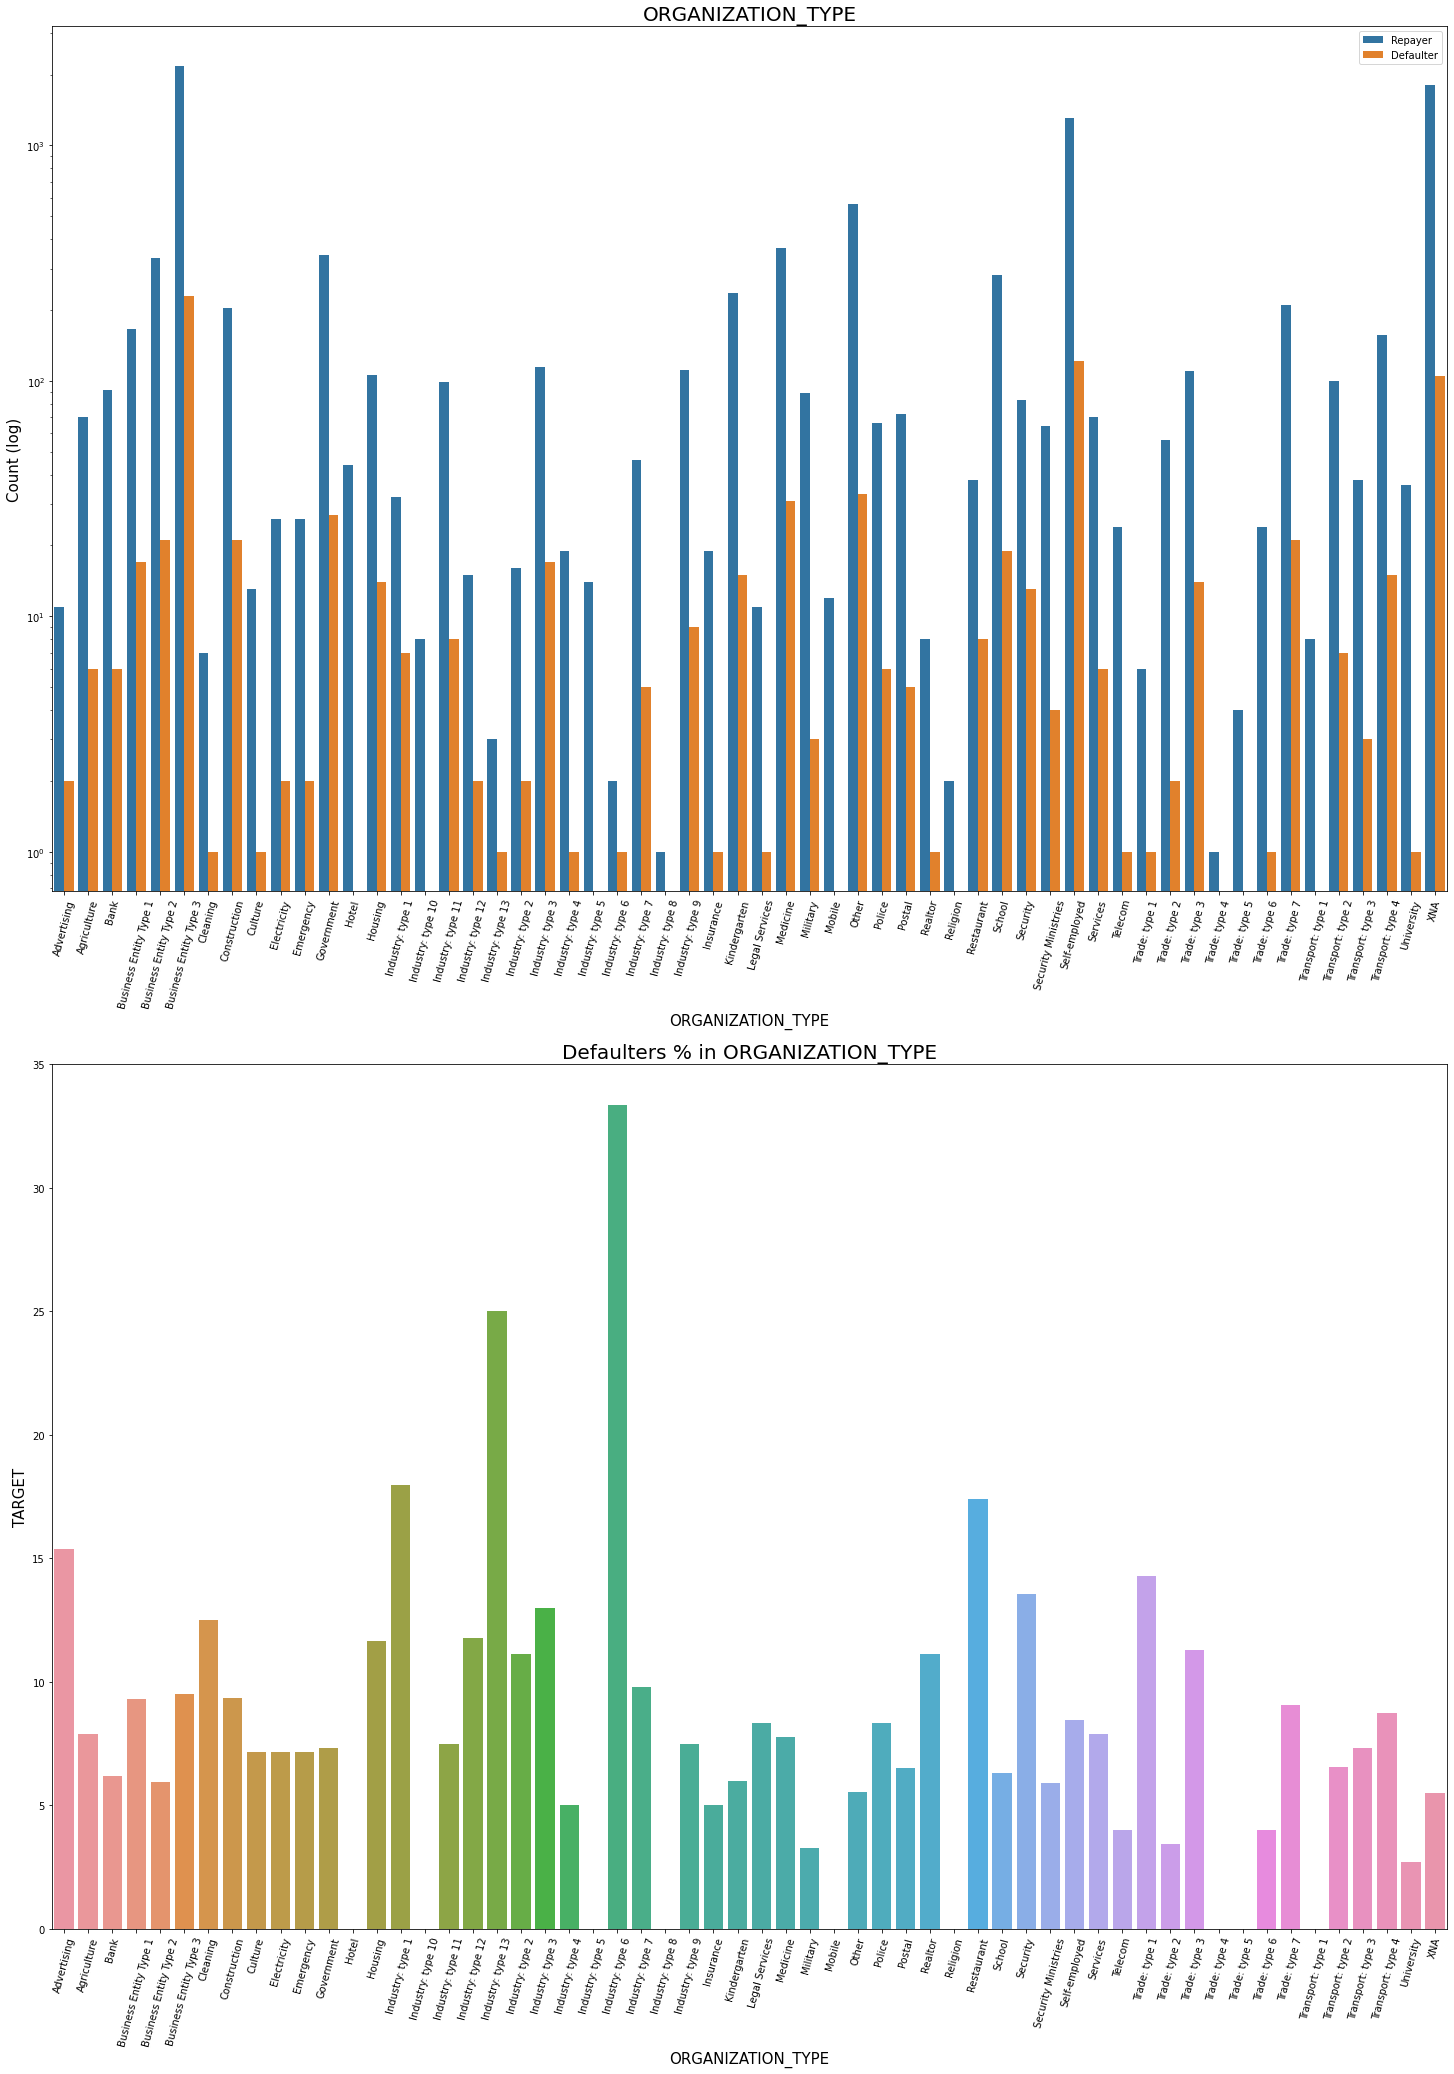

In [ ]:
#10 Checking Loan repayment status based on Organization type

univariate(appl_data,"ORGANIZATION_TYPE","TARGET",True,True,False)

**Inferences: Organization Type**
* **Organizations with highest percent of defaultess are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).**
* **Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.**
* **Most of the people application for loan are from Business Entity Type 3**
* **For a very high number of applications, Organization type information is unavailable(XNA)**
* **It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8**

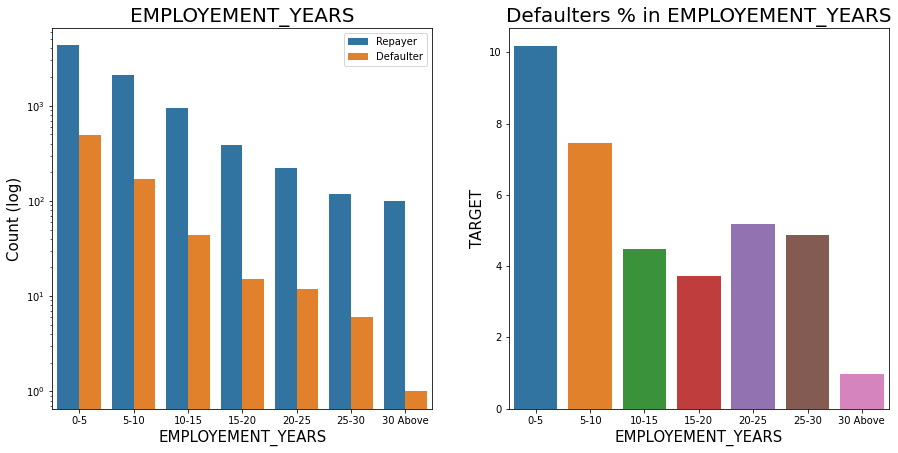

In [ ]:
#11 Analyzing Employment_Year based on loan repayment status
univariate(appl_data,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

**Inferences: Employment in Years**
* **Majority of the applicants having working experience between 0-5 years are defaultees. The defaulting rating of this group is also the highest which is around 10%**
* **With increase of employment year, defaulting rate is radually decreasing.**
* **with people having 40+ year experience have less than 1% default rate**

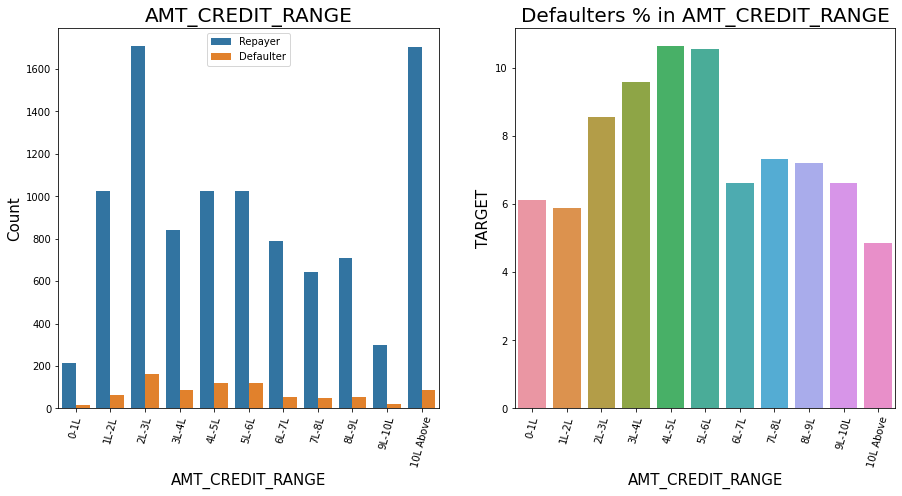

In [ ]:
#12 Analyzing Amount_Credit based on loan repayment status

univariate(appl_data,"AMT_CREDIT_RANGE","TARGET",False,True,True)

**Inferences: Loan Amount**
* **there are high number of applicants have loan in range of 2-3 Lakhs followed by 10 Lakh above range**
* **People who get loan for 3-6 Lakhs have most number of defaulters than other loan range.**

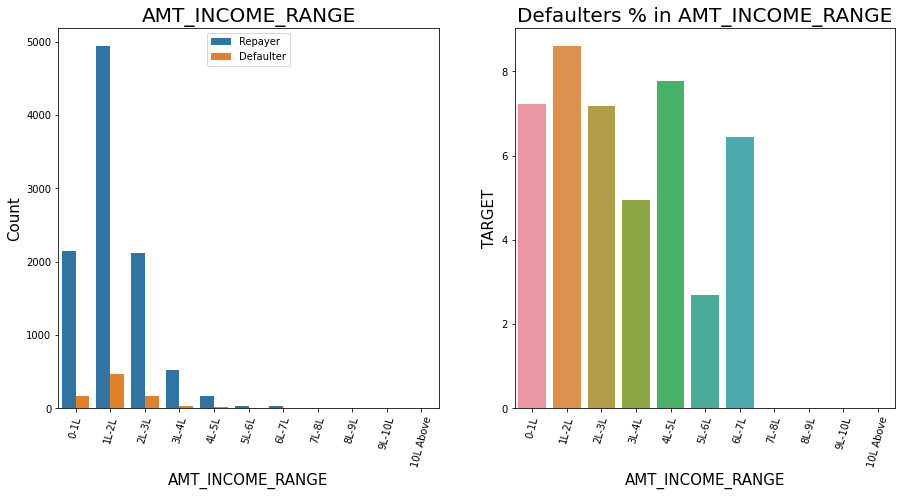

In [ ]:
#13  Analyzing Amount_Income Range based on loan repayment status

univariate(appl_data,"AMT_INCOME_RANGE","TARGET",False,True,True)

**Inferences: Applicant Income**
* **Majority of the applications have Income total less than 3 Lakhs.**
* **Application with Income less than 3 Lakhs has high probability of defaulting**
* **Applicant with Income 7-8 Lakhas are less likely to default.**

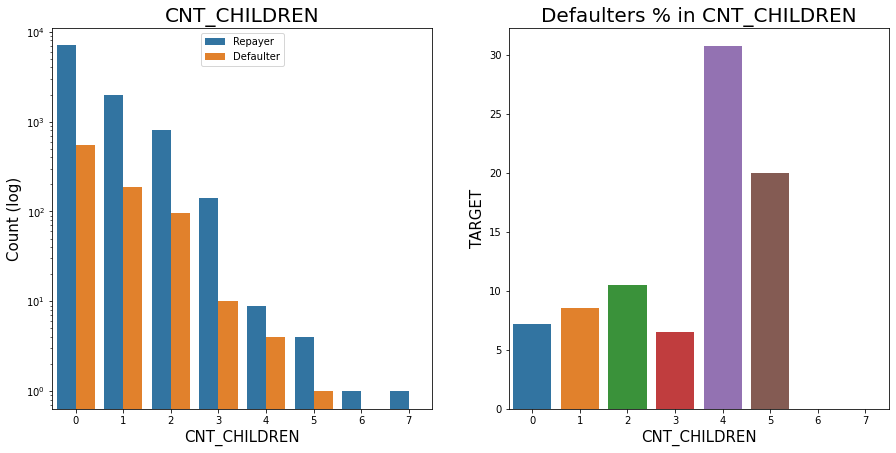

In [ ]:
#14  Analyzing Number of children based on loan repayment status

univariate(appl_data,"CNT_CHILDREN","TARGET",True,False,True)

**Inferences: Client Children's Count**
* **Most of the applicants do not have children**
* **Very few clients have more than 3 children.**
* **Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate**

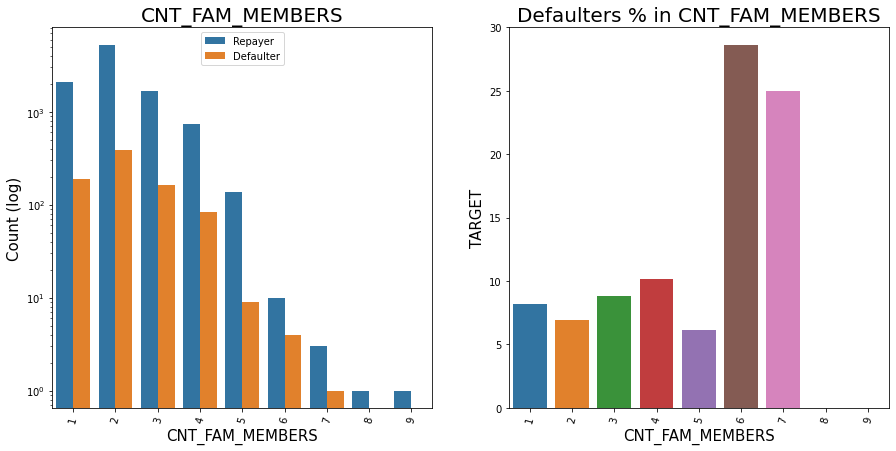

In [ ]:
#15 Analyzing Number of family members based on loan repayment status
univariate(appl_data,"CNT_FAM_MEMBERS","TARGET",True,True,True)

**Inferences: Family Memembers Count**
* **Family member follows the same trend as children where having more family members increases the risk of defaulting**

### 6.3.2 Categorical Bivariate or Multivariate Analysis

In [ ]:
appl_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Commercial associate,2503.0,2.016910,1.140952,0.3600,1.35000,1.8000,2.31750,13.500
Pensioner,1915.0,1.373212,0.854120,0.2700,0.90000,1.1700,1.71000,19.350
State servant,709.0,1.742770,0.860217,0.2700,1.12500,1.5750,2.25000,7.875
Student,1.0,1.800000,NaN,1.8000,1.80000,1.8000,1.80000,1.800
Unemployed,2.0,2.362500,1.431891,1.3500,1.85625,2.3625,2.86875,3.375
Working,5695.0,1.622098,0.869131,0.2565,1.12500,1.3500,2.02500,22.500


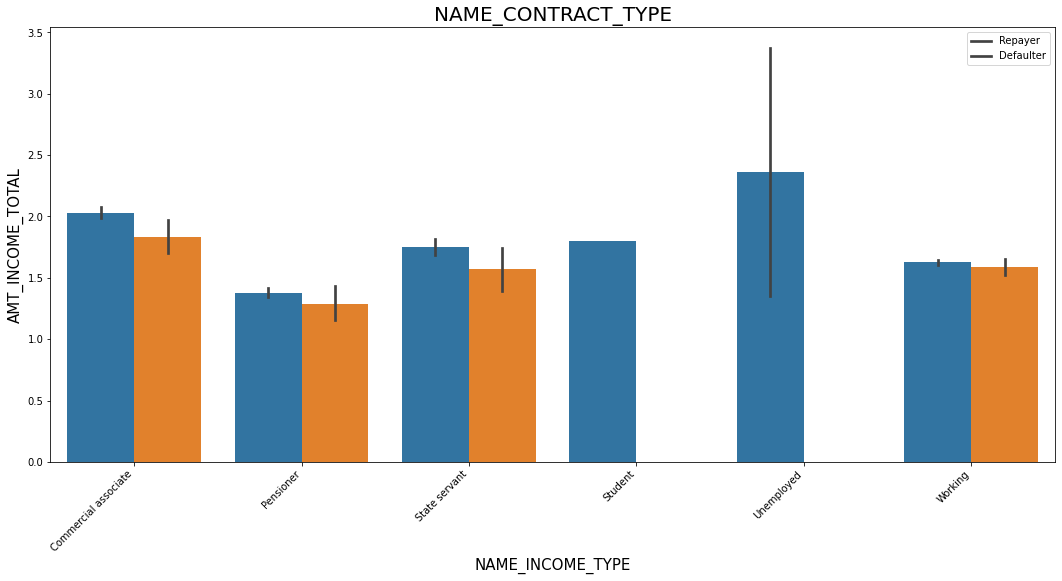

In [ ]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",appl_data,"TARGET",(18,8),['Repayer','Defaulter'])

**Inferences:**
* **It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs**

### 6.3.3 Numeric Variables Analysis

**Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis**

In [ ]:
#Listing all the columnns of dataframe "appl_data"
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [ ]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = appl_data.loc[appl_data['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = appl_data.loc[appl_data['TARGET']==1, cols_for_correlation]

In [ ]:
len(cols_for_correlation)

41

**Correlation between numeric variable**

In [ ]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987205
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.788622
43,AMT_ANNUITY,AMT_CREDIT,0.785512
131,DAYS_EMPLOYED,DAYS_BIRTH,0.616352
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.456059
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.394618
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.389149
152,DAYS_REGISTRATION,DAYS_BIRTH,0.345734
373,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,0.322143
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.272589


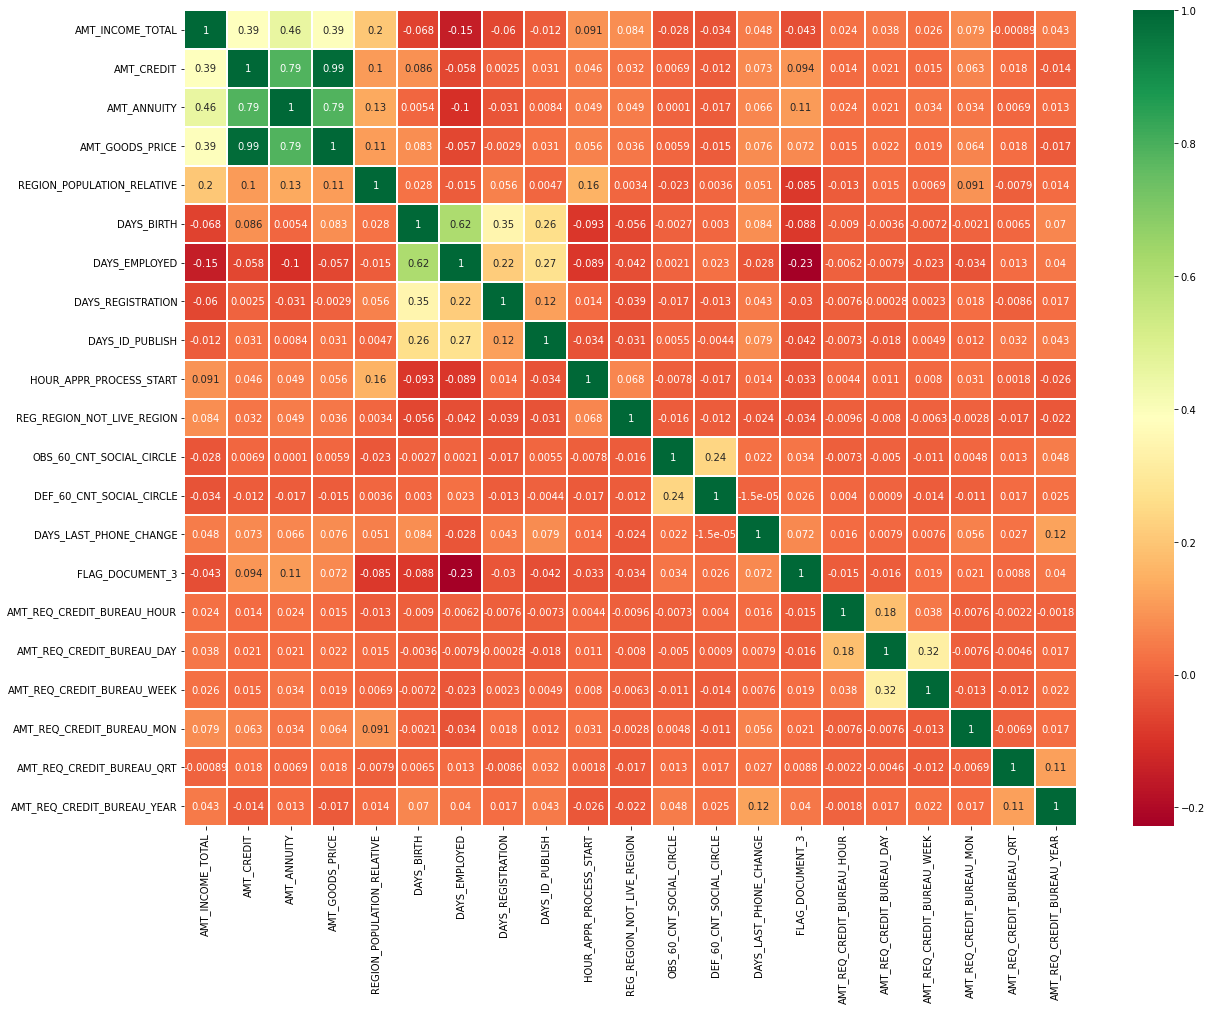

In [ ]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences:**
**Correlating factors amongst repayers**

**1. Credit amount is highly correlated with:**
* **Goods Price Amount**
* **Loan Annuity**
* **Total Income**

**2. We can also see that repayers have high correlation in number of days employed.**

In [ ]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.982779
43,AMT_ANNUITY,AMT_CREDIT,0.778529
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.778020
131,DAYS_EMPLOYED,DAYS_BIRTH,0.587896
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.503099
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.367219
300,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.295780
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.284581
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.277461
263,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.263365


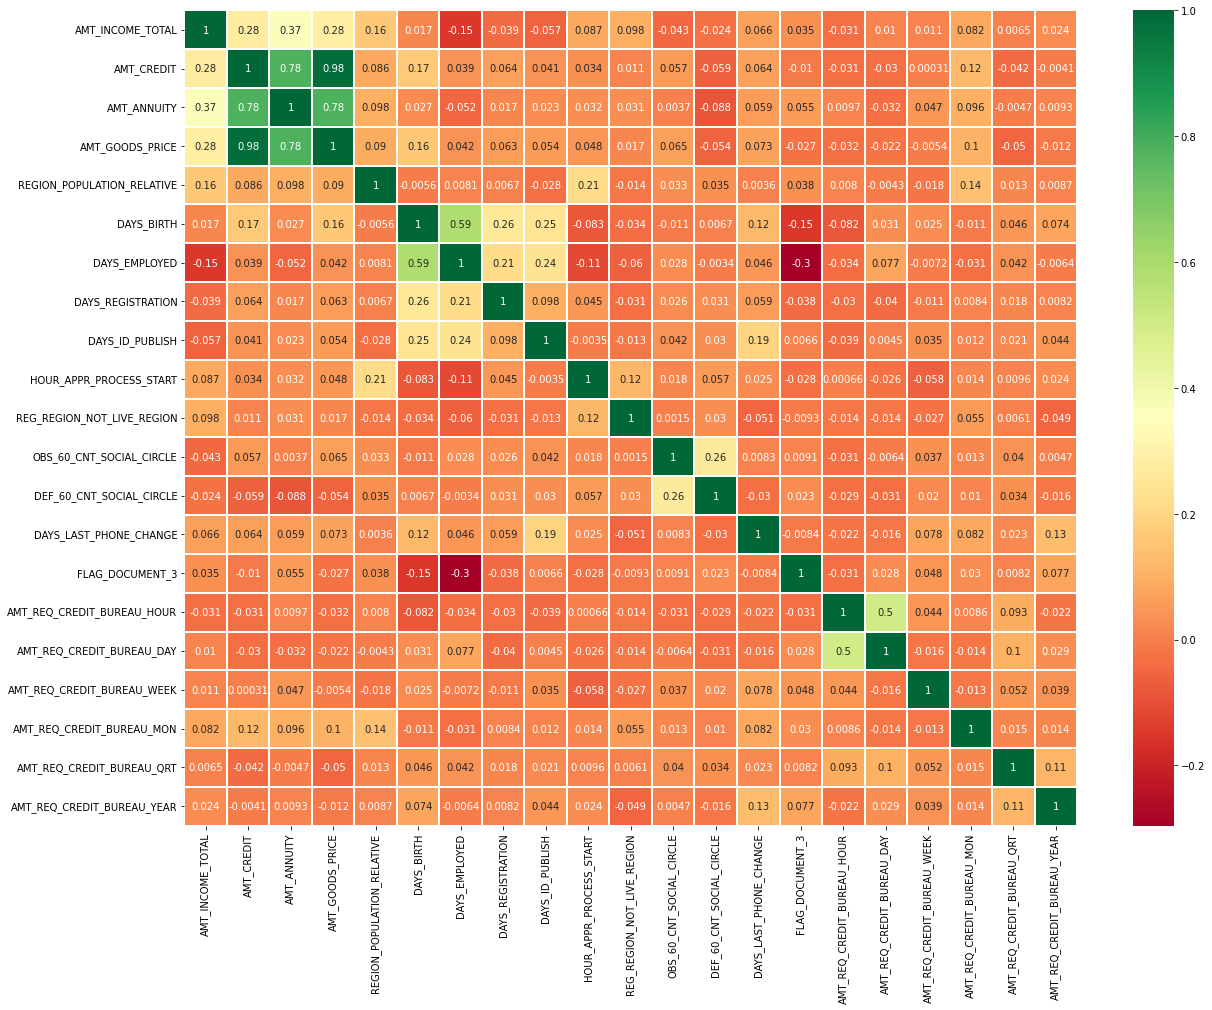

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences: Correlating factors amongst repayers**
* **Credit amount is highly correlated with good price amount which is same as repayers.**
* **Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)**
* **We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).**
* **There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.**
* **Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.**
* **There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)**

### 6.3.4 Numerical Univariate Analysis

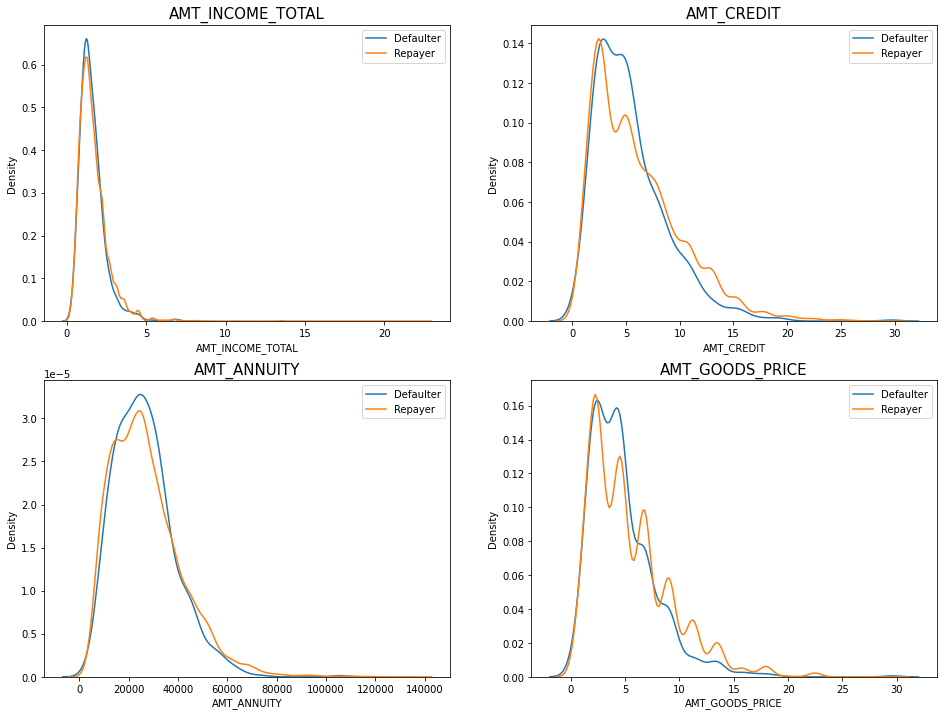

In [ ]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = appl_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

**Inferences:**
* **Most no of loans are given for goods price below 10 lakhs**
* **Most people pay annuity below 50K for the credit loan**
* **Credit amount of the loan is mostly less then 10 lakhs**
* **The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision**

### 6.3.5 Numerical Bivariate Analysis

<Figure size 1080x1080 with 0 Axes>

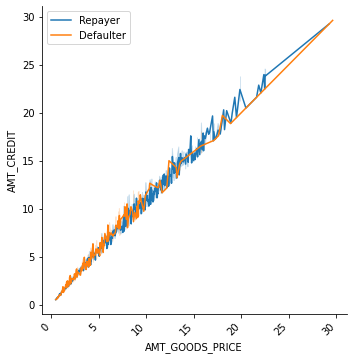

In [ ]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',appl_data,"TARGET", "line",['Repayer','Defaulter'])

**Inferences:**
* **When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.**

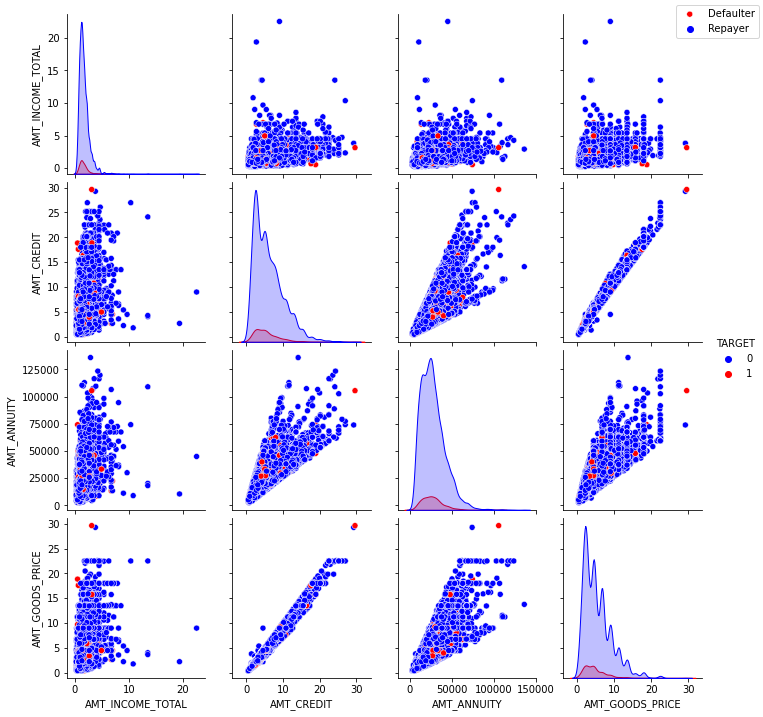

In [ ]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = appl_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

**Inferences:**
* **When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters**
* **Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line**
* **There are very less defaulters for AMT_CREDIT >20 Lakhs**

## 7. Merged Dataframes Analysis

In [ ]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(appl_data, prev_appl, how='inner', on='SK_ID_CURR')
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100007,0,Cash loans,M,Y,0,1.215,5.130000,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L,54.608219,50-55,8.323288,5-10,2001242,Cash loans,16509.600,180000.0,180000.0,180000.0,XNA,Approved,865.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.0,high,Cash Street: high,365243.0,834.0,324.0,354.0,347.0,0.0,3
1,100009,0,Cash loans,F,Y,1,1.710,15.607260,41301.0,13.950,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213,619,1,Accountants,3,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1L-2L,10L Above,10L Above,37.747945,35-40,8.575342,5-10,1413109,Consumer loans,8996.760,98239.5,98239.5,98239.5,XAP,Approved,449.0,Cash through the bank,XAP,Unknown,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164.0,Consumer electronics,12.0,low_action,POS household without interest,365243.0,418.0,88.0,88.0,84.0,0.0,2
2,100026,0,Cash loans,F,N,1,4.500,4.975200,32521.5,4.500,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.020713,11146,4306,114,2518,1,Sales staff,3,3,2,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,468.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4L-5L,4L-5L,4L-5L,30.536986,30-35,11.797260,10-15,1252218,Consumer loans,23608.485,132345.0,132345.0,132345.0,XAP,Approved,1427.0,Cash through the bank,XAP,"Spouse, partner",New,Computers,POS,XNA,Country-wide,200.0,Consumer electronics,6.0,low_normal,POS household without interest,365243.0,1396.0,1246.0,1246.0,1243.0,0.0,4
3,100035,0,Cash loans,F,Y,0,2.925,6.658920,24592.5,4.770,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266,3787,1,Unknown,2,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1634.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,2L-3L,6L-7L,4L-5L,41.863014,40-45,7.309589,5-10,1339797,Cash loans,10879.695,0.0,0.0,NaN,XNA,Refused,138.0,XNA,HC,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,0.0,XNA,0.0,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100043,0,Cash loans,F,Y,2,1.980,6.411735,23157.0,5.535,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018

In [ ]:
#Checking the details of the merged dataframe
loan_df.shape

(919, 82)

In [ ]:
# checking the columns and column types of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 918
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   919 non-null    int64   
 1   TARGET                       919 non-null    int64   
 2   NAME_CONTRACT_TYPE_x         919 non-null    category
 3   CODE_GENDER                  919 non-null    category
 4   FLAG_OWN_REALTY              919 non-null    category
 5   CNT_CHILDREN                 919 non-null    category
 6   AMT_INCOME_TOTAL             919 non-null    float64 
 7   AMT_CREDIT_x                 919 non-null    float64 
 8   AMT_ANNUITY_x                919 non-null    float64 
 9   AMT_GOODS_PRICE_x            918 non-null    float64 
 10  NAME_TYPE_SUITE_x            917 non-null    category
 11  NAME_INCOME_TYPE             919 non-null    category
 12  NAME_EDUCATION_TYPE          919 non-null    category
 13  NAME_

In [ ]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

**Plotting Contract Status vs purpose of the loan**

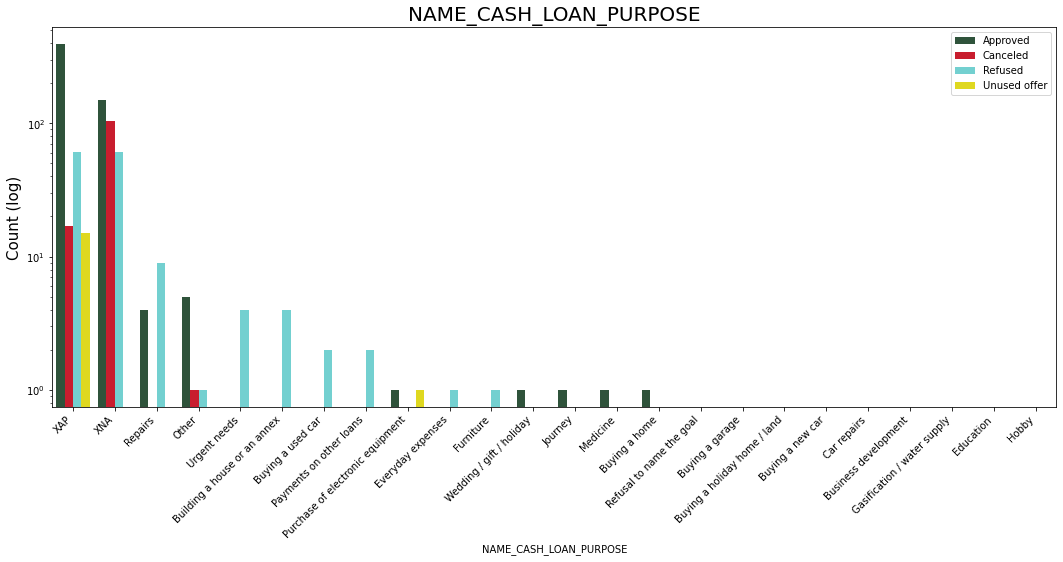

In [ ]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

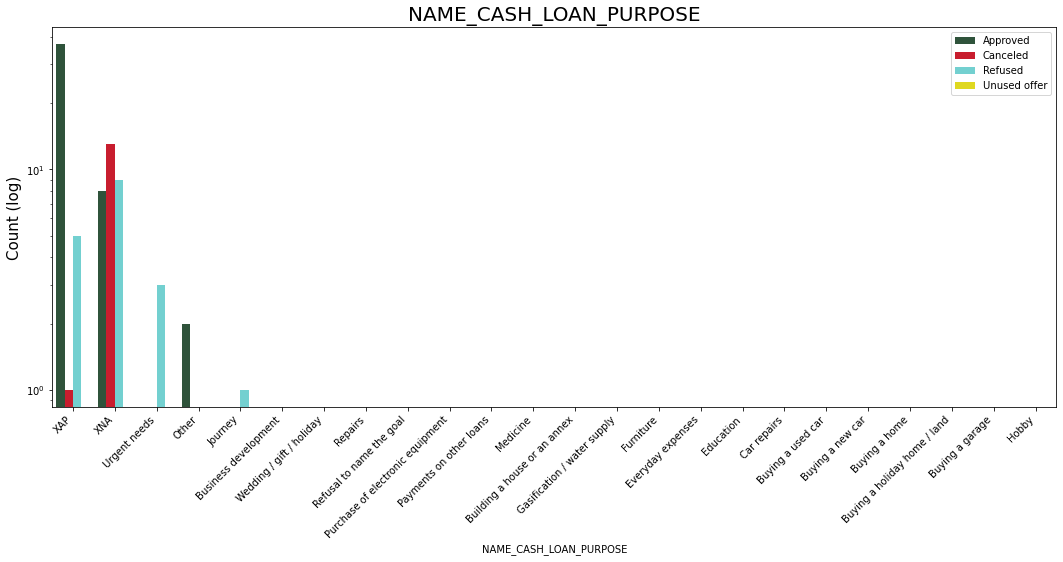

In [ ]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

**Inferences:**
* **Loan purpose has high number of unknown values (XAP, XNA)**
* **Loan taken for the purpose of Repairs looks to have highest default rate**
* **Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.**

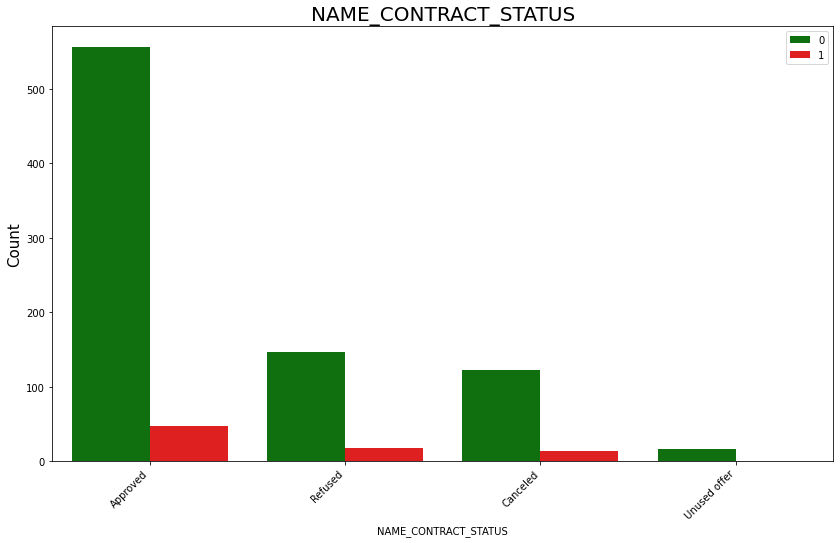

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0          556     92.21%
                     1           47      7.79%
Canceled             0          122     89.71%
                     1           14     10.29%
Refused              0          146     89.02%
                     1           18     10.98%
Unused offer         0           16     100.0%

In [ ]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

**Inferences:**
* **89.71% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients**
* **89.02% of the clients who have been previously refused a loan has payed back the loan in current case.**
* **Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.**

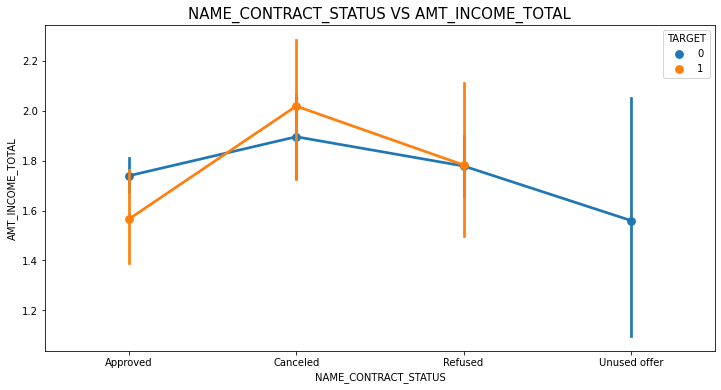

In [ ]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**Inferences:**
* **The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others**

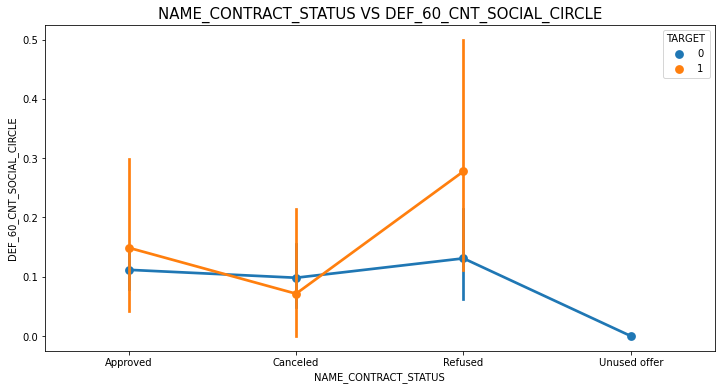

In [ ]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Inferences:**
* **Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.**

## 7. Conclusions

 A. Decisive Factor whether an applicant will be Repayer:
1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **REGION_RATING_CLIENT: RATING 1 is safer.**
4. **ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%**
5. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
6. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
7. **AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default**
8. **NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.**
9. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

 B. Decisive Factor whether an applicant will be Defaulter:
1. **CODE_GENDER: Men are at relatively higher default rate**
2. **NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.**
3. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
4. **NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.**
5. **REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.**
6. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
7. **ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.**
8. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
9. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
10. **CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.**
11. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

 C. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:


1. **NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.**
2. **AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.**
3. **AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.**
4. **CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.**
5. **NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.**

 D. Suggestions:
* **89.71% % of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **89.02% % of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**